### 月資料處理
- 2020/07仍存續的標的
- 存續期間>12月的標的
- 建立技術指標

In [ ]:
import pandas as pd
import numpy as np
import datetime
# import talib

In [ ]:
etf = pd.read_csv(r'C:\Users\danie\OneDrive\桌面\ETF股價資料.csv')

In [ ]:
etf = etf.groupby("證券代碼").filter(lambda x: len(x) > 12).reset_index(drop=True)

In [ ]:
etf['年月'] = etf['年月'].astype('str').apply(lambda x:datetime.datetime.strptime(x,'%Y/%m/%d').strftime('%Y/%m'))

In [ ]:
etf = etf.rename(columns={'證券代碼':'公司','年月':'Date','開盤價(元)':'Open','最高價(元)':'High','最低價(元)':'Low','收盤價(元)':'Close','成交量(百萬股)':'Volume'})

In [ ]:
temp = etf.copy()

In [ ]:
stock_index=pd.DataFrame()

for company in temp['公司'].unique():
    ## Overlap Studies
    temp2=pd.DataFrame({'MA5':talib.MA(temp[temp['公司']==company]['Close'], timeperiod=5, matype=0)})
    temp2['MA10']=talib.MA(temp[temp['公司']==company]['Close'], timeperiod=10, matype=0)
    temp2['upperband'],temp2['middleband'],temp2['lowerband']=talib.BBANDS(temp[temp['公司']==company]['Close'], timeperiod=20, nbdevup=2, nbdevdn=2, matype=0)

    ## Momentum Indicators
    temp2['STOCH_slowk'],temp2['STOCH_slowd']=talib.STOCH(temp[temp['公司']==company]['High'], temp[temp['公司']==company]['Low'], temp[temp['公司']==company]['Close'])
    temp2['WILLR']=talib.WILLR(temp[temp['公司']==company]['High'], temp[temp['公司']==company]['Low'], temp[temp['公司']==company]['Close'])
    temp2['RSI_12']=talib.RSI(temp[temp['公司']==company]['Close'], timeperiod=12)
    temp2['RSI_6']=talib.RSI(temp[temp['公司']==company]['Close'], timeperiod=6)

    ## Volatility Indicator
    temp2['ATR']=talib.ATR(temp[temp['公司']==company]['High'], temp[temp['公司']==company]['Low'], temp[temp['公司']==company]['Close'],timeperiod=12)
    temp2['CCI']=talib.CCI(temp[temp['公司']==company]['High'], temp[temp['公司']==company]['Low'], temp[temp['公司']==company]['Close'],timeperiod=12)
    temp2['MOM_3']=talib.MOM(temp[temp['公司']==company]['Close'],timeperiod=3)
    temp2['MOM_6']=talib.MOM(temp[temp['公司']==company]['Close'],timeperiod=6)
    temp2['MOM_9']=talib.MOM(temp[temp['公司']==company]['Close'],timeperiod=9)
    temp2['MOM_12']=talib.MOM(temp[temp['公司']==company]['Close'],timeperiod=12)

    
    temp2['Date']=temp[temp['公司']==company]['Date']
    temp2['公司']=temp[temp['公司']==company]['公司']

    stock_index=pd.concat([stock_index,temp2],axis=0)
    stock_index=stock_index.reset_index(drop=True)

In [ ]:
stock_index = stock_index.dropna().reset_index(drop=True)

In [ ]:
stock_index = stock_index.merge(etf, on=['Date','公司'], how='left')

In [ ]:
stock_index['MA5']=(stock_index['Close']-stock_index['MA5'])/stock_index['MA5']
stock_index['MA10']=(stock_index['Close']-stock_index['MA10'])/stock_index['MA10']
stock_index['upperband']=(stock_index['Close']-stock_index['upperband'])/stock_index['upperband']
stock_index['lowerband']=(stock_index['Close']-stock_index['lowerband'])/stock_index['lowerband']
stock_index['middleband']=(stock_index['Close']-stock_index['middleband'])/stock_index['middleband']
stock_index['ATR']=stock_index['ATR']/stock_index['Close']
stock_index['MOM_3']=stock_index['MOM_3']/stock_index['Close']
stock_index['MOM_6']=stock_index['MOM_6']/stock_index['Close']
stock_index['MOM_9']=stock_index['MOM_9']/stock_index['Close']
stock_index['MOM_12']=stock_index['MOM_12']/stock_index['Close']

### 日資料處理(籌碼面影響應該小，先不放)

In [ ]:
# daily = pd.read_csv(r'C:\Users\danie\OneDrive\桌面\etf日資料.csv')
# daily = daily.fillna(0)

In [ ]:
# daily['年月日'] = daily['年月日'].astype('str').apply(lambda x:datetime.datetime.strptime(x,'%Y/%m/%d').strftime('%Y/%m'))

In [ ]:
# for col in daily.columns[2:]:
#     daily[col] = daily[col].astype(str).apply(lambda x: x.replace(',','')).astype(int)

In [ ]:
# daily = daily.rename(columns={'年月日':'年月'})

In [ ]:
# daily = daily.groupby(['證券代碼','年月'], as_index=False).sum()

In [ ]:
# daily['年月'] = daily['年月'].astype('str').apply(lambda x:datetime.datetime.strptime(x,'%Y/%m').strftime('%Y/%m'))

In [ ]:
# data = stock_index.merge(daily, left_on=['公司','Date'], right_on=['證券代碼','年月'], how='left')

In [ ]:
# data = data.drop(['成交量(百萬股)_月','成交量(千股)'], axis=1)

In [ ]:
# data['流通在外股數(千股)'] = data['流通在外股數(千股)'].astype(str).apply(lambda x: x.replace(',','')).astype(int)

# for col in data.columns[28:]:
#     data[col] = data[col]/data['流通在外股數(千股)']

In [ ]:
data = stock_index.drop(['Date', 'Open', 'High', 'Low', 'Close', '流通在外股數(千股)','成交量(百萬股)_月'], axis=1)

In [ ]:
data[data.columns[data.columns!='公司']] = data[data.columns[data.columns!='公司']].astype(float)

In [ ]:
data['label'] = data.groupby(['公司'])['報酬率％_月'].shift(-1).reset_index(drop=True)

In [ ]:
data = data.dropna().reset_index(drop=True)

In [ ]:
# data.to_csv(r'C:\Users\danie\OneDrive\桌面\for_colab.csv', encoding = 'utf-8-sig', index=False)

#### 指數

In [ ]:
index = ['0050 元大台灣50', '0051 元大中型100', '0052 富邦科技', '0053 元大電子',
'0054 元大台商50', '0055 元大MSCI金融', '0056 元大高股息', '0057 富邦摩台',
'0061 元大寶滬深', '006201 元大富櫃50', '006203 元大MSCI台灣', '006204 永豐臺灣加權',
'006205 富邦上証', '006206 元大上證50', '006207 FH滬深', '006208 富邦台50',
'00625K 富邦上証+R', '00631L 元大台灣50正2', '00632R 元大台灣50反1',
'00633L 富邦上証正2', '00634R 富邦上証反1','00636 國泰中國A50', '00636K 國泰中國A50+U', '00637L 元大滬深300 正2',
'00638R 元大滬深300 反1', '00639 富邦深100', '00640L 富邦日本正2',
'00641R 富邦日本反1','00643 群益深証中小', '00645 富邦日本',
'00646 元大S&P500', '00647L 元大S&P500正2', '00648R 元大S&P500反1',
'00650L FH香港正2', '00651R FH香港反1', '00652 富邦印度', '00653L 富邦印度正2',
'00654R 富邦印度反1', '00655L 國泰中國A50正2', '00656R 國泰中國A50反1',
'00657 國泰日經225', '00657K 國泰日經225+U', '00660 元大歐洲50',
'00661 元大日經225', '00662 富邦NASDAQ', '00663L 國泰臺灣加權正2',
'00664R 國泰臺灣加權反1', '00665L 富邦恒生國企正2', '00666R 富邦恒生國企反1',
'00668 國泰美國道瓊', '00668K 國泰美國道瓊+U', '00669R 國泰美國道瓊反1',
'00670L 富邦NASDAQ正2', '00671R 富邦NASDAQ反1','00675L 富邦臺灣加權正2',
'00676R 富邦臺灣加權反1', '00677U 富邦VIX', '00678 群益NBI生技','00685L 群益臺灣加權正2', '00686R 群益臺灣加權反1','00690 兆豐藍籌30',
'00691R 兆豐藍籌30反1', '00692 富邦公司治理','00700 富邦恒生國企', '00701 國泰股利精選30',
'00702 國泰標普低波高息', '00703 台新MSCI中國','00709 富邦歐洲','00713 元大台灣高息低波', '00717 富邦美國特別股','00728 第一金工業30',
'00730 富邦臺灣優質高息', '00731 FH富時高息低波','00733 富邦臺灣中小',  '00735 國泰臺韓科技', '00736 國泰新興市場',
'00737 國泰AI+Robo', '00739 元大MSCI A股','00742 新光內需收益',
'00743 國泰中國A150', '00752 中信中國50', '00753L 中信中國50正2','008201 BP上證50']

#### 匯率

In [ ]:
foreign = ['00682U 元大美元指數', '00683L 元大美元指數正2', '00684R 元大美元指數反1','00706L 元大S&P日圓正2',
'00707R 元大S&P日圓反l','00732 國泰RMB 短期報酬',]

#### 債券

In [ ]:
bond = ['00679B 元大美債20年', '00680L 元大美債20正2', '00681R 元大美債20反1', '00688L 國泰20年美債正2', '00689R 國泰20年美債反1','00694B 富邦美債1-3', '00695B 富邦美債7-10', '00696B 富邦美債20年',
'00697B 元大美債7-10','00687B 國泰20年美債','00710B FH彭博高收益債', '00711B FH彭博新興債','00718B 富邦中國政策債', '00719B 元大美債1-3',
'00720B 元大投資級公司債', '00721B 元大中國債3-5', '00722B 群益15年IG電信債',
'00723B 群益15年IG科技債', '00724B 群益10年IG金融債', '00725B 國泰投資級公司債',
'00726B 國泰5Y+新興債', '00727B 國泰1-5Y高收債','00734B 台新JPM新興債','00740B 富邦全球投等債', '00741B 富邦全球高收債', '00744B 國泰中國政金債5+', '00745B 富邦中政債0-1',
'00746B 富邦A級公司債', '00747B FH中國政策債', '00748B 凱基中國債3-10',
'00749B 凱基新興債10+', '00750B 凱基科技債10+', '00751B 元大AAA至A公司債','00754B 群益AAA-AA公司債',
'00755B 群益15年IG公用債', '00756B 群益15年EM主權債', '00758B FH能源債',
'00759B FH製藥債', '00760B FH新興企業債', '00761B 國泰A 級公司債']

#### 商品

In [ ]:
future = ['00635U 元大S&P 黃金', '00642U 元大S&P 石油','00672L 元大S&P原油正2','00714 群益道瓊美國地產', '00715L 街口布蘭特油正2',
'00673R 元大S&P原油反1', '00674R 元大S&P黃金反1','00693U 街口S&P黃豆','00708L 元大S&P黃金正2','00712 FH富時不動產','00738U 元大道瓊白銀'] 

In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# mms=MinMaxScaler()
# minmax_col=['MA5', 'MA10', 'upperband', 'middleband', 'lowerband', 'STOCH_slowk',
#        'STOCH_slowd', 'WILLR', 'RSI_12', 'RSI_6', 'ATR', 'CCI', 'MOM_3',
#        'MOM_6', 'MOM_9', 'MOM_12', '報酬率％_月', '週轉率％_月', '高低價差%']

# temp_train=pd.DataFrame()
# company=data['公司'].unique()

# for i in range(len(company)):
#     temp_company=company[i]
#     temp_train=pd.concat([temp_train,pd.DataFrame(mms.fit_transform(data.loc[data['公司']==temp_company,minmax_col]))])

# # 用minmax變數取代原本的變數
# temp_train=temp_train.reset_index(drop=True)
# temp_train.columns=minmax_col

# for col in temp_train.columns:
#     data.loc[:,col]=temp_train.loc[:,col]

# Auto-encoder


## data

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
import datetime
drive.mount('/content/gdrive') # 此處需要登入google帳號
# # 獲取授權碼之後輸入即可連動雲端硬碟
data = pd.read_csv("/content/gdrive/My Drive/for_colab2.csv")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
sigma = pd.read_csv("/content/gdrive/My Drive/標準差.csv")

In [ ]:
data['Date'] = data['Date'].astype('str').apply(lambda x:datetime.datetime.strptime(x,'%Y/%m/%d').strftime('%Y/%m'))

In [ ]:
g = data.groupby('公司')
val = g.tail(2)
train = data.iloc[~data.index.isin(val.index), :]
g = val.groupby('公司')
test = g.tail(1)
val = val.iloc[~val.index.isin(test.index), :]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
minmax_col=['MA5', 'MA10', 'upperband', 'middleband', 'lowerband', 'STOCH_slowk',
       'STOCH_slowd', 'WILLR', 'RSI_12', 'RSI_6', 'ATR', 'CCI', 'MOM_3',
       'MOM_6', 'MOM_9', 'MOM_12', '報酬率％_月', '週轉率％_月', '高低價差%']


temp_train = pd.DataFrame(mms.fit_transform(train.loc[:,minmax_col]))
temp_train.columns=minmax_col
temp_val = pd.DataFrame(mms.transform(val.loc[:,minmax_col]))
temp_val.columns=minmax_col
temp_test = pd.DataFrame(mms.transform(test.loc[:,minmax_col]))
temp_test.columns=minmax_col

In [ ]:
for col in ['Date', '公司', 'label']:
    temp_train[col] = train[col].reset_index(drop=True)
    temp_test[col] = test[col].reset_index(drop=True)
    temp_val[col] = val[col].reset_index(drop=True)

print(temp_train.shape, train.shape, temp_test.shape, test.shape, temp_val.shape, val.shape)

(3959, 22) (3959, 22) (140, 22) (140, 22) (136, 22) (136, 22)


In [ ]:
mms_data = pd.concat([temp_train, temp_val, temp_test]).reset_index(drop=True)

In [ ]:
mms_data = mms_data.sort_values(by = ['公司', 'Date']).reset_index(drop=True)

In [ ]:
mms_data = mms_data.groupby("公司").filter(lambda x: len(x) > 7).reset_index(drop=True)

#### create time series data by group

In [ ]:
def temporalize(X, y, lookback):
    output_X = []
    output_y = []
    for i in range(len(X)-lookback+1):
        t = []
        for j in range(1,lookback+1):
            # Gather past records upto the lookback period
            t.append(X.loc[[(i+j-1)], :].values)
        output_X.append(t)
        output_y.append(y[i+lookback-1])
    return output_X, output_y

In [ ]:
n_features = 19
timesteps = 6

train_data = []
val_data = []
test_data = []

for company in mms_data['公司'].unique():
    output_X = []
    output_Y = []

    temp = mms_data[mms_data['公司']==company].reset_index(drop=True).drop(['公司'], axis=1)
    x, y = temporalize(temp.drop(['label','Date'], axis=1), temp['label'], 6)

    output_X.extend(x)
    output_Y.extend(y)

    X = np.array(output_X)
    X = X.reshape(X.shape[0], timesteps, n_features) #(該公司序列數,12,19)

    for i in range(len(X)-2): 
      
        temp_x=torch.tensor(X[i],dtype=torch.float32)
        temp_y=torch.tensor(output_Y[i],dtype=torch.float32).reshape(-1,1)
        train_data.append([temp_x, temp_y])
    
    val_data.append([torch.tensor(X[-2],dtype=torch.float32), torch.tensor(output_Y[-2],dtype=torch.float32).reshape(-1,1)])
    test_data.append([torch.tensor(X[-1],dtype=torch.float32), torch.tensor(output_Y[-1],dtype=torch.float32).reshape(-1,1)])

In [ ]:
trainloader = torch.utils.data.DataLoader(train_data, batch_size=8, num_workers=1, shuffle=True, drop_last=False)
valloader = torch.utils.data.DataLoader(val_data, batch_size=8, num_workers=1, shuffle=False, drop_last=False)
testloader = torch.utils.data.DataLoader(test_data, batch_size=8, num_workers=1, shuffle=False, drop_last=False)

## model



In [ ]:
sequence_length = 6
input_size = 19

In [ ]:
class LSTM_AE(nn.Module):

    def __init__(self, bidirectional):
        super(LSTM_AE, self).__init__()
        
        self.lstm1 = nn.LSTM( input_size=19,      #input的維度
                              hidden_size=256,    #幾個hidden unit
                              num_layers=1,      #hidden 有幾層
                              batch_first=True, 
                              bidirectional=False)
        
        self.lstm2 = nn.LSTM( input_size=256,      
                              hidden_size=128,    
                              num_layers=1,      
                              batch_first=True, 
                              bidirectional=False)
        
        self.code = nn.LSTM( input_size=128,      
                              hidden_size=64,    
                              num_layers=1,      
                              batch_first=True, 
                              bidirectional=False)
    
        self.delstm1 = nn.LSTM( input_size=64,     
                                hidden_size=128,    
                                num_layers=1,     
                                batch_first=True, 
                                bidirectional=False)
        
        self.delstm2 = nn.LSTM( input_size=128,     
                                hidden_size=256,    
                                num_layers=1,      
                                batch_first=True, 
                                bidirectional=False)
        
        self.out1 = nn.Linear(256, 128)
        self.out2 = nn.Linear(128, 64)
        self.out3 = nn.Linear(64, 19)

        # initialize weights
        nn.init.orthogonal_(self.lstm1.weight_ih_l0, gain=np.sqrt(2))
        nn.init.orthogonal_(self.lstm1.weight_hh_l0, gain=np.sqrt(2))
        nn.init.orthogonal_(self.lstm2.weight_ih_l0, gain=np.sqrt(2))
        nn.init.orthogonal_(self.lstm2.weight_hh_l0, gain=np.sqrt(2))
        nn.init.orthogonal_(self.delstm1.weight_ih_l0, gain=np.sqrt(2))
        nn.init.orthogonal_(self.delstm1.weight_hh_l0, gain=np.sqrt(2))
        nn.init.orthogonal_(self.delstm2.weight_ih_l0, gain=np.sqrt(2))
        nn.init.orthogonal_(self.delstm2.weight_hh_l0, gain=np.sqrt(2))
        nn.init.orthogonal_(self.code.weight_ih_l0, gain=np.sqrt(2))
        nn.init.orthogonal_(self.code.weight_hh_l0, gain=np.sqrt(2))

    def encode(self, x):
        out, _ = self.lstm1(x)  # out: tensor of shape (batch_size, seq_length, hidden_size)
        out, _ = self.lstm2(out)  
        out, _ = self.code(out)
        code = out[:, -1, :].unsqueeze(1)
        out = code.expand(-1, 6, -1)  #最後只拿T時間layer的output當作我的code(feature)

        
        return code, out
        
    def decode(self, x):
        out,  _ = self.delstm1(x) 
        out, _ = self.delstm2(out)  
        out = self.out1(out)
        out = self.out2(out)
        out = self.out3(out)

        return out

    def forward(self, x):
        code, out1 = self.encode(x)
        out = self.decode(out1)

        return code, out

In [ ]:
auto_encoder = LSTM_AE(bidirectional = False).to(device)
print(auto_encoder)

LSTM_AE(
  (lstm1): LSTM(19, 256, batch_first=True)
  (lstm2): LSTM(256, 128, batch_first=True)
  (code): LSTM(128, 64, batch_first=True)
  (delstm1): LSTM(64, 128, batch_first=True)
  (delstm2): LSTM(128, 256, batch_first=True)
  (out1): Linear(in_features=256, out_features=128, bias=True)
  (out2): Linear(in_features=128, out_features=64, bias=True)
  (out3): Linear(in_features=64, out_features=19, bias=True)
)


In [ ]:
criterion = nn.L1Loss(reduction='sum').to(device)
optimizer = torch.optim.Adam(auto_encoder.parameters(), lr=0.005)
# optimizer = torch.optim.RMSprop(auto_encoder.parameters(), lr = 0.005, weight_decay = 0.001)

epochs 0
train


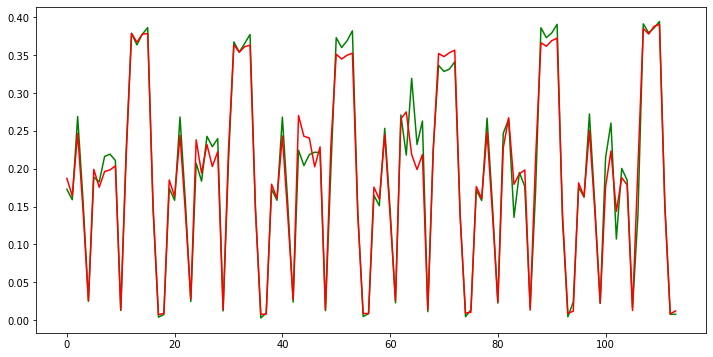

test


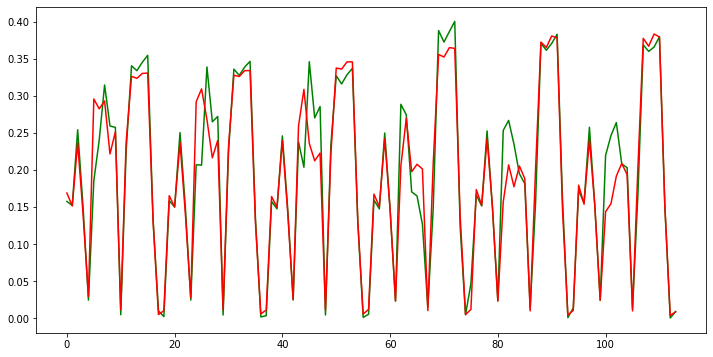

train: 2.5984454715911225 

test: 2.535085764017191 

epochs 20
train


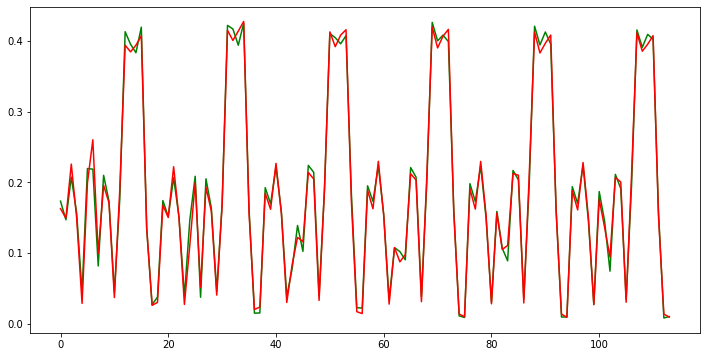

test


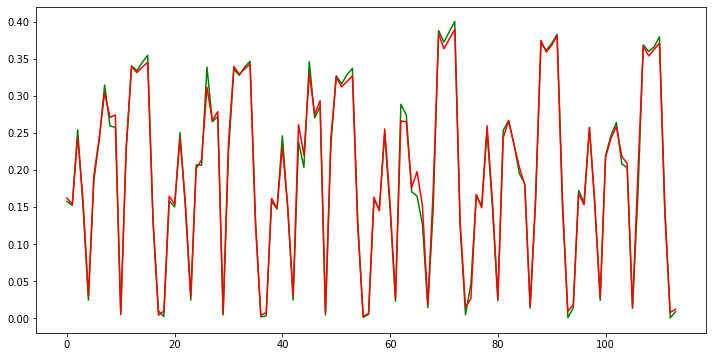

train: 0.73613593168501 

test: 1.299472851796193 

epochs 40
train


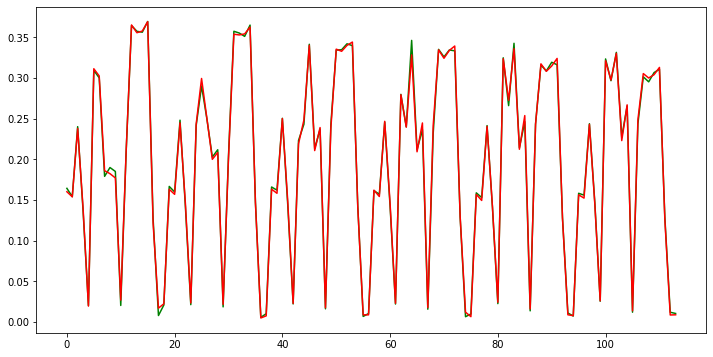

test


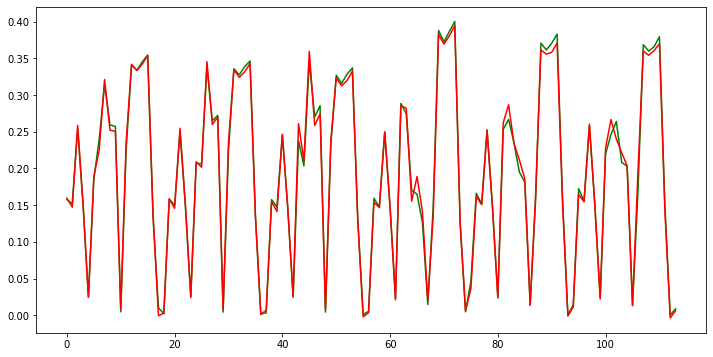

train: 0.5353688506623911 

test: 0.9145297359775852 

epochs 60
train


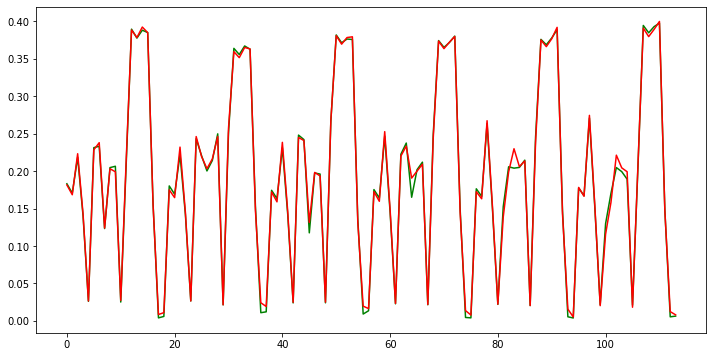

test


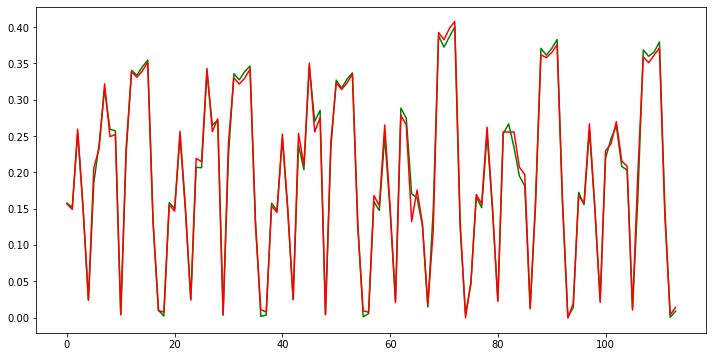

train: 0.47903759470613194 

test: 0.8216398900693601 

epochs 80
train


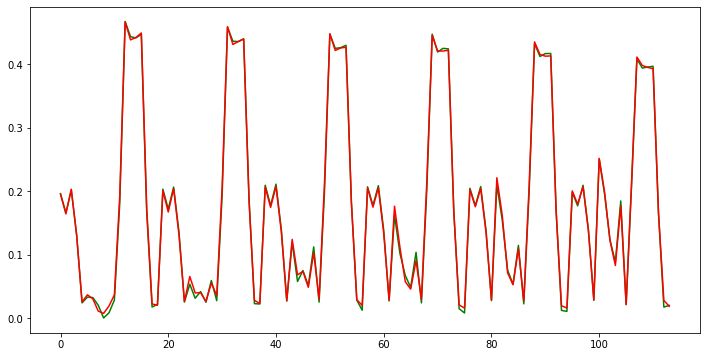

test


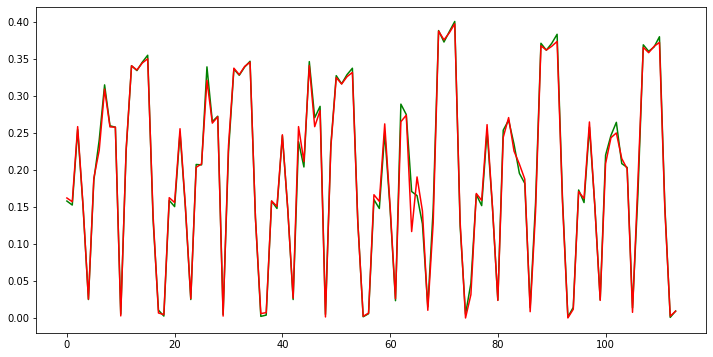

train: 0.43085577674154385 

test: 0.7648527471868841 

epochs 100
train


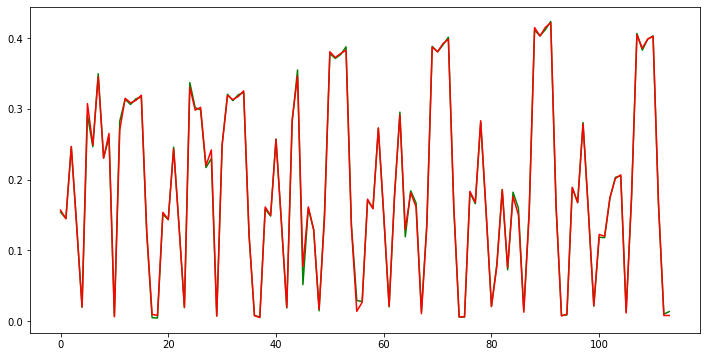

test


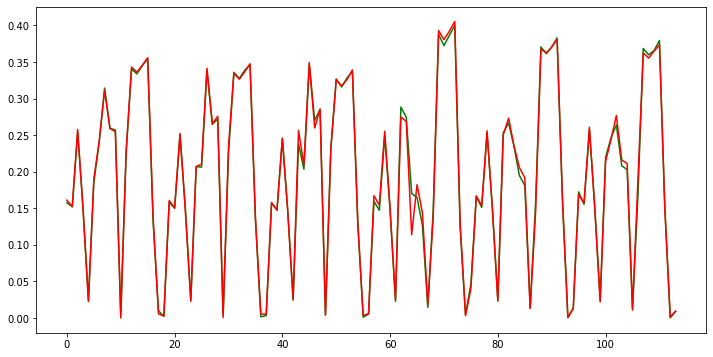

train: 0.4116958376181678 

test: 0.6827254510140633 

epochs 120
train


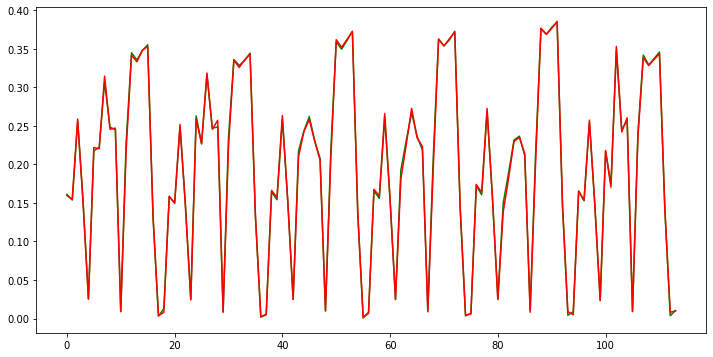

test


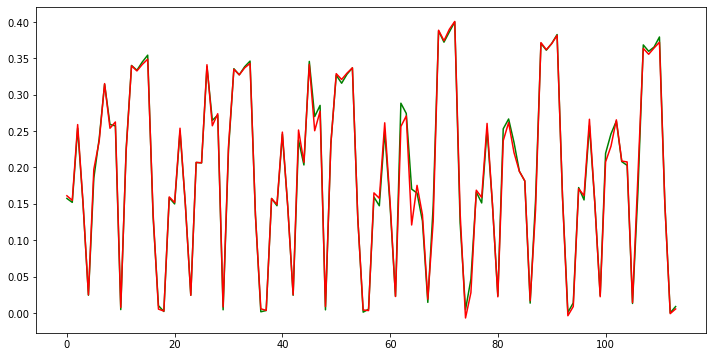

train: 0.3957757874543713 

test: 0.7445604371594953 

epochs 140
train


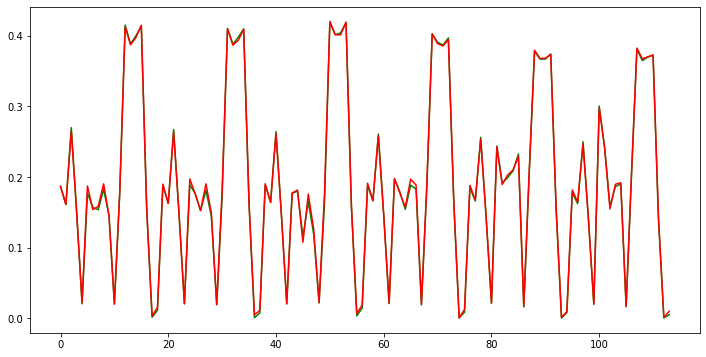

test


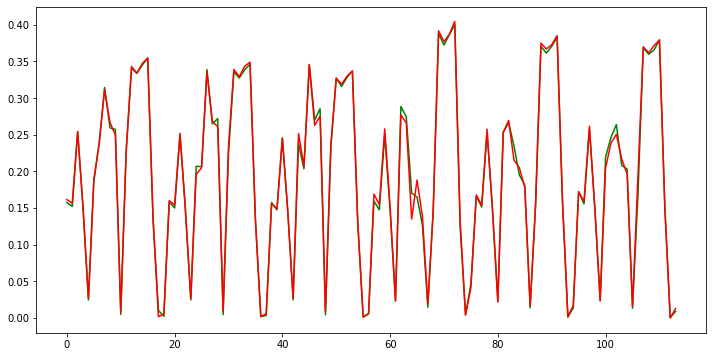

train: 0.3546384604700656 

test: 0.7015950056883666 

epochs 160
train


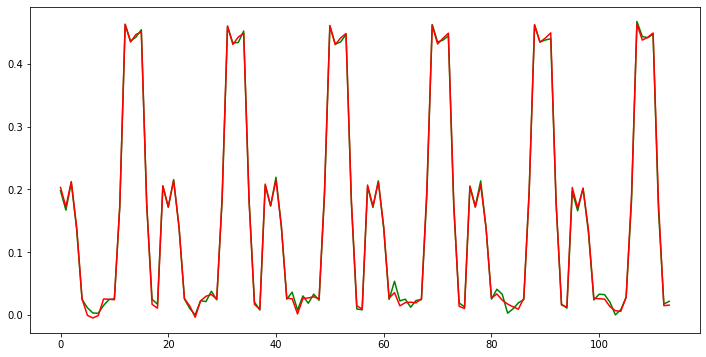

test


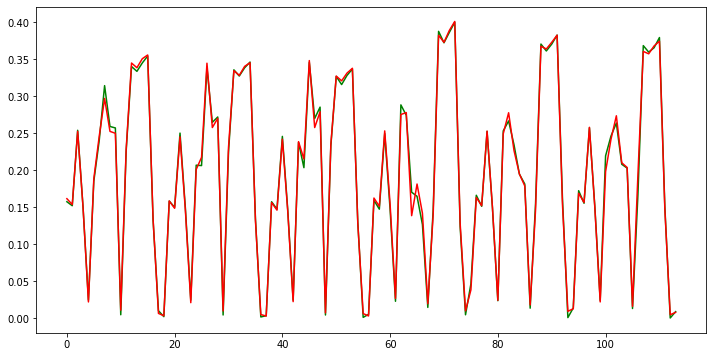

train: 0.34509508719358745 

test: 0.6847656804162103 

epochs 180
train


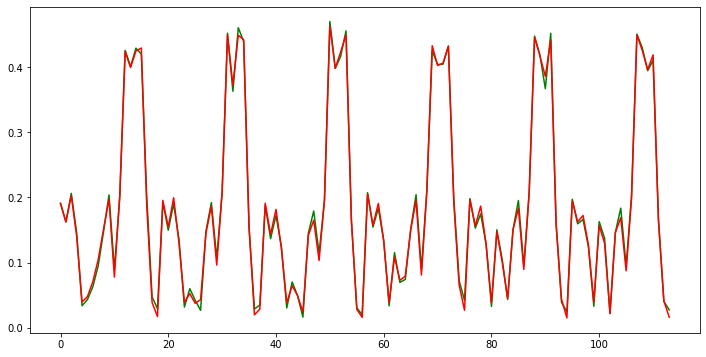

test


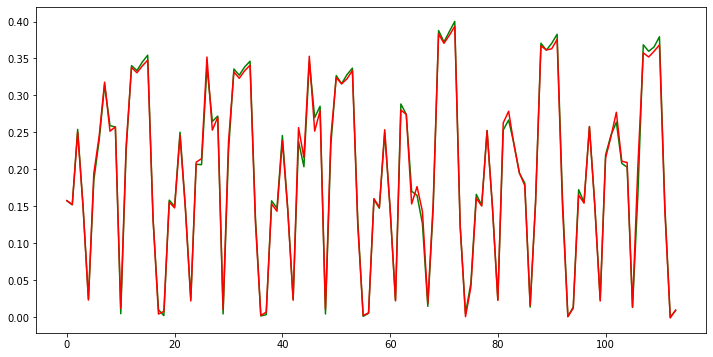

train: 0.32411814029975855 

test: 0.7061473829252226 

epochs 200
train


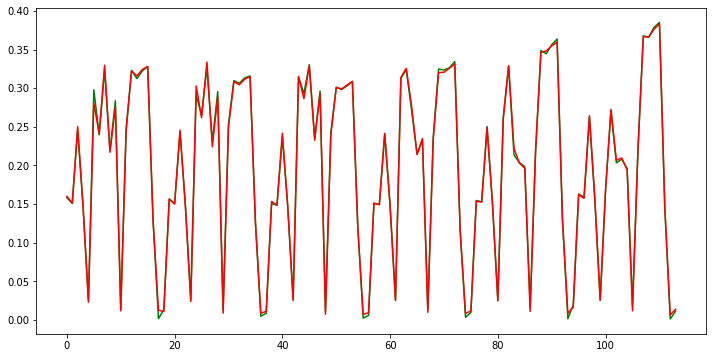

test


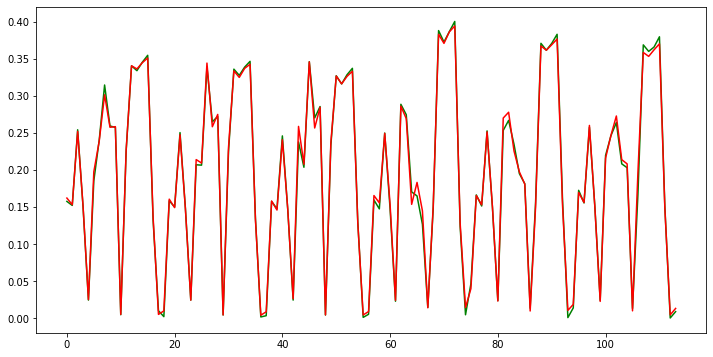

train: 0.3209420777400691 

test: 0.6513040645702465 



In [ ]:
epochs=range(201)
train=[]
test=[]
auto_encoder.train()

for epoch in epochs:
    if epoch%20==0:
        print('epochs',epoch)
    
    running_loss = 0
    test_loss = 0
    running_n = 0
    test_n = 0

    for i,data in enumerate(trainloader, 0):
        batch_loss = 0
        inputs, _ = data
        #依sequence中個別feature去normalize
        n_inputs = F.normalize(inputs, p=2, dim=2)
        # #normalize data to gaussian
        # n_inputs = torch.nn.functional.gelu(n_inputs)
        n_inputs = n_inputs.to(device)

        optimizer.zero_grad()
        code, out = auto_encoder(n_inputs)

        #get training loss
        loss = criterion(out.to(device), n_inputs)
        loss.backward()
        optimizer.step()

        running_n += len(out)
        running_loss += loss.item()

    if epoch%20==0:
        print('train')
        plt.figure(figsize = (12,6))
        plt.plot(range(114),n_inputs[0].flatten().data.cpu().numpy(),'g',range(114),out[0].flatten().data.cpu().numpy(),'r')
        plt.show()

    train.append(running_loss/running_n)

    with torch.no_grad():
        for j,data in enumerate(valloader, 0):
            test_batch_loss = 0
            inputs, _ = data
            n_inputs = F.normalize(inputs, p=2, dim=2)
            # n_inputs = torch.nn.functional.gelu(n_inputs)
            n_inputs = n_inputs.to(device)
            code, out = auto_encoder(n_inputs)

            #get training loss
            loss = criterion(out.to(device), n_inputs)

            test_n += len(out)
            test_loss += loss.item()

        if epoch%20==0:
            print('test')
            plt.figure(figsize = (12,6))
            plt.plot(range(114),n_inputs[0].flatten().data.cpu().numpy(),'g',range(114),out[0].flatten().data.cpu().numpy(),'r')
            plt.show()

        test.append(test_loss/test_n)

    if epoch%20==0:
        print('train:',running_loss/running_n, '\n')
        print('test:',test_loss/test_n, '\n')




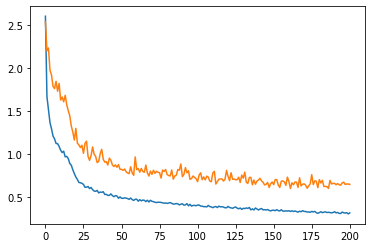

In [ ]:
plt.plot(range(len(train)), train, range(len(test)), test)

In [ ]:
n_features = 19
timesteps = 6

output_X = []
output_Y = []

for company in mms_data['公司'].unique():

    temp = mms_data[mms_data['公司']==company].reset_index(drop=True).drop(['公司'], axis=1)
    x, y = temporalize(temp.drop(['label','Date'], axis=1), temp['label'], timesteps)

    output_X.extend(x)
    output_Y.extend(y)

    company_list.extend([company]*(len(x)))
    date_list.extend(temp['Date'][-len(x):])

    X = np.array(output_X)
    X = X.reshape(X.shape[0], timesteps, n_features)

all_data = []

for i in range(len(X)): 
  
    temp_x=torch.tensor(X[i],dtype=torch.float32)
    temp_y=torch.tensor(output_Y[i],dtype=torch.float32).reshape(-1,1)
    all_data.append([temp_x, temp_y])
    
get_code = torch.utils.data.DataLoader(all_data, batch_size=1, num_workers=1, shuffle=False, drop_last=False)


In [ ]:
# get every data's codes
auto_encoder.eval()
codes = []
for j,data in enumerate(get_code, 0):
    inputs, _ = data
    n_inputs = F.normalize(inputs, p=2, dim=2)
    # n_inputs = torch.nn.functional.gelu(n_inputs)
    n_inputs = n_inputs.to(device)
    code, out = auto_encoder(n_inputs)
    
    codes.append(code)

In [ ]:
code_df = [x.data.cpu().numpy().reshape(1,64) for x in codes]
code_df = pd.DataFrame(np.array(code_df).reshape(-1,64))

In [ ]:
code_df['label'] = output_Y
code_df['ETF'] = company_list
code_df['date'] = date_list

In [ ]:
code_df.to_csv('/content/gdrive/My Drive/encoded_nobi2_seq64.csv', index=False)

# Load AE code

In [ ]:
import torch
from torch import nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
import datetime
drive.mount('/content/gdrive') # 此處需要登入google帳號

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
code_df = pd.read_csv('/content/gdrive/My Drive/encoded_nobi2_seq64.csv')

In [ ]:
sigma = pd.read_csv('/content/gdrive/My Drive/sigma.csv')

In [ ]:
sigma['年月'] = sigma['年月'].astype('str').apply(lambda x:datetime.datetime.strptime(x,'%Y/%m').strftime('%Y/%m'))

In [ ]:
sigma = sigma.rename(columns = {'收盤價(元)':'std'})

In [ ]:
sigma['std'] = sigma.groupby(['證券代碼'])['std'].shift(-1).reset_index(drop=True)

In [ ]:
code_df = code_df.merge(sigma, left_on=['ETF', 'date'], right_on = ['證券代碼', '年月']).drop(['證券代碼', '年月'], axis=1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
m = [ code_df['ETF'].isin(index),  
    code_df['ETF'].isin(foreign), 
    code_df['ETF'].isin(bond),
    code_df['ETF'].isin(future) ]

code_df['group'] = np.select(m, [1,2,3,4], default=0)
code_df['label'] = code_df['label']/100

In [ ]:
code_df['label'] = np.log1p(code_df['label'])

In [ ]:
code_df = code_df[['反' not in x for x in code_df['ETF']]].reset_index(drop=True)

In [ ]:
g = code_df.groupby('ETF')
val = g.tail(2)
train = code_df.iloc[~code_df.index.isin(val.index), :]
g = val.groupby('ETF')
test = g.tail(1)
val = val.iloc[~val.index.isin(test.index), :]

In [ ]:
scaler = MinMaxScaler()

mms_code = scaler.fit_transform(train.iloc[:,:64])
train.iloc[:,:64] = mms_code

mms_code = scaler.transform(val.iloc[:,:64])
val.iloc[:,:64] = mms_code

mms_code = scaler.transform(test.iloc[:,:64])
test.iloc[:,:64] = mms_code

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

In [ ]:
## 打散train
train = train.sample(frac=1).reset_index(drop=True)
test = test.reset_index(drop=True)
val = val.reset_index(drop=True)

#組內模型

In [ ]:
class LSTM_pred(nn.Module):

    def __init__(self):
        super(LSTM_pred, self).__init__()
        
        self.lstm1 = nn.LSTM( input_size=1,      #input的維度, 此例每個hidden input就一個數字
                              hidden_size=32,    #幾個hidden unit
                              num_layers=1,      #hidden 有幾層
                              batch_first=True)
        
        self.lstm2 = nn.LSTM( input_size=32,     
                              hidden_size=16,   
                              num_layers=1,      
                              batch_first=True)
        
        
        nn.init.orthogonal_(self.lstm1.weight_ih_l0, gain=5/3)
        nn.init.orthogonal_(self.lstm1.weight_hh_l0, gain=5/3)

        nn.init.orthogonal_(self.lstm2.weight_ih_l0, gain=5/3)
        nn.init.orthogonal_(self.lstm2.weight_hh_l0, gain=5/3)

        self.out = nn.Linear(16, 1)

    def forward(self, x):
        out, _ = self.lstm1(x)
        out, _ = self.lstm2(out)
        out = self.out(out[:,-1,:])

        return out

# index model

In [ ]:
group1 = train[train['group']==1].reset_index(drop=True)
group1_val = val[val['group']==1].reset_index(drop=True)
group1_test = test[test['group']==1].reset_index(drop=True)


train_data = []
val_data = []
test_data = []

for i in range(len(group1)): 
    
    temp_x = torch.tensor(group1.iloc[i,:-4],dtype=torch.float32).reshape(-1,1)
    temp_y = torch.tensor(group1.iloc[i,-4],dtype=torch.float32).reshape(-1,1)
    train_data.append([temp_x, temp_y])

for i in range(len(group1_val)):
    temp_x = torch.tensor(group1_val.iloc[i,:-4],dtype=torch.float32).reshape(-1,1)
    temp_y = torch.tensor(group1_val.iloc[i,-4],dtype=torch.float32).reshape(-1,1)
    val_data.append([temp_x, temp_y])

for i in range(len(group1_test)):
    temp_x = torch.tensor(group1_test.iloc[i,:-4],dtype=torch.float32).reshape(-1,1)
    temp_y = torch.tensor(group1_test.iloc[i,-4],dtype=torch.float32).reshape(-1,1)
    test_data.append([temp_x, temp_y])

trainloader = torch.utils.data.DataLoader(train_data, batch_size=32, num_workers=1, shuffle=False, drop_last=False)
valloader = torch.utils.data.DataLoader(val_data, batch_size=32, num_workers=1, shuffle=False, drop_last=False)
testloader = torch.utils.data.DataLoader(test_data, batch_size=1000, num_workers=1, shuffle=False, drop_last=False)

In [ ]:
group1_lstm = LSTM_pred().to(device)
print(group1_lstm)

LSTM_pred(
  (lstm1): LSTM(1, 32, batch_first=True)
  (lstm2): LSTM(32, 16, batch_first=True)
  (out): Linear(in_features=16, out_features=1, bias=True)
)


## 除了準確度外，亦將預測的方向是否正確納入LOSS的計算當中

In [ ]:
criterion = nn.MSELoss(reduction='sum').to(device)
# criterion = nn.L1Loss(reduction='sum').to(device)
direct_loss = nn.L1Loss(reduction='mean').to(device)
optimizer = torch.optim.Adam(group1_lstm.parameters(), lr=0.0005, weight_decay=2e-5)

epochs 0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


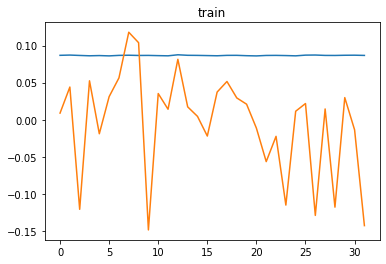

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


0.041351336238428245


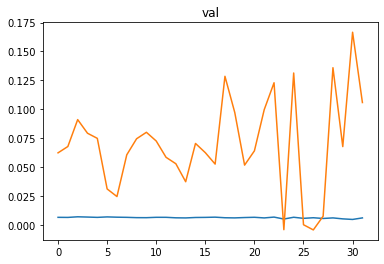

0.012307807550591937

epochs 1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


0.04088646767885488
0.012818721391386905

epochs 2
0.04053407825579304
0.012982308359469398

epochs 3
0.04018340014362972
0.01307233713440976

epochs 4
0.03985818187348928
0.0131216726060641

epochs 5
0.039451500786300914
0.013143064106925059

epochs 6
0.03937078416230494
0.013142585249270424

epochs 7
0.03962410313033758
0.013118750463097783

epochs 8
0.03958757587353482
0.013069325079352169

epochs 9
0.03973601264114889
0.013034274012355481

epochs 10
0.03988196426716607
0.01303014058177754

epochs 11
0.03961372852887085
0.013052385742381468

epochs 12
0.039357064563150634
0.013104782771256011

epochs 13
0.03883402666766642
0.013109597614256003

epochs 14
0.03868166343530206
0.01306548815662578

epochs 15
0.03835893552538269
0.013013937210632582

epochs 16
0.03840497579582074
0.01296830985505702

epochs 17
0.038475944802112375
0.012928236339051845

epochs 18
0.038424498458258724
0.012892003786765922

epochs 19
0.038471422665344764
0.01285832968808837

epochs 20


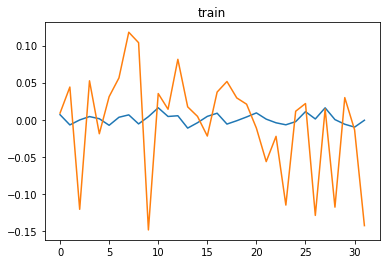

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


0.038371289857565584


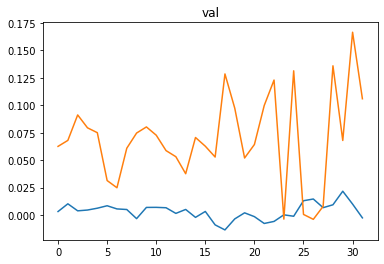

0.012826316942602901

epochs 21


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


0.038222224936094014
0.012795342732284028

epochs 22
0.03824505417029624
0.012764972145274535

epochs 23
0.038292528275279
0.012734884932889776

epochs 24
0.03836463234403061
0.012704857830273903

epochs 25
0.038461356688163584
0.01267472869258816

epochs 26
0.03855815109759159
0.012644380331039429

epochs 27
0.03858139218186976
0.012613738492383795

epochs 28
0.03850653298377616
0.0125827385207354

epochs 29
0.03848079983093807
0.012551344047158451

epochs 30
0.038332416560072316
0.012519529310323425

epochs 31
0.03835584191092801
0.012487280166755288

epochs 32
0.03825660757237806
0.012454591060088853

epochs 33
0.038329174132921855
0.01242147613379915

epochs 34
0.038565789548658976
0.012387950541609424

epochs 35
0.038515713105353365
0.012354039539725093

epochs 36
0.03859610121344696
0.012319777981709626

epochs 37
0.038742375809115714
0.012285220420966714

epochs 38
0.03876597552754432
0.012250415349410753

epochs 39
0.03881413074488915
0.01221543550491333

epochs 40


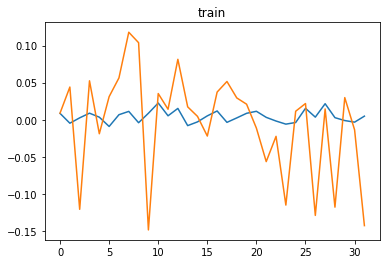

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


0.03876414678590084


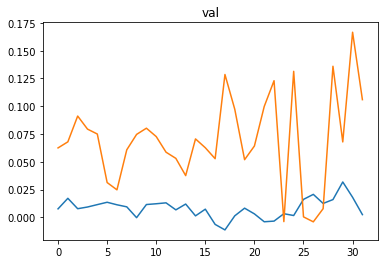

0.01218034453311209

epochs 41


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


0.03871417799134511
0.012145223253864353

epochs 42
0.0386642235187535
0.012110146930662253

epochs 43
0.03876151472716225
0.012075191837246134

epochs 44
0.03893243515308951
0.012040438288349217

epochs 45
0.03893159652252407
0.012005951444981462

epochs 46
0.03880807711743915
0.01197179040666354

epochs 47
0.0388072611867188
0.011938013262667899

epochs 48
0.038830993523726896
0.011904656887054443

epochs 49
0.038756579874448326
0.011871754112890211

epochs 50
0.038829405517450816
0.011839326660511858

epochs 51
0.0387550055114812
0.011807376045291708

epochs 52
0.03872968853807093
0.011775914390208357

epochs 53
0.03877799144482023
0.011744928562034995

epochs 54
0.03877721997771396
0.011714405427544804

epochs 55
0.03872737327088175
0.01168432882276632

epochs 56
0.03875114445504742
0.011654677532486996

epochs 57
0.03870129945655407
0.011625424280004987

epochs 58
0.03870053194436926
0.011596540273246119

epochs 59
0.03865068610340743
0.011567999245756763

epochs 60


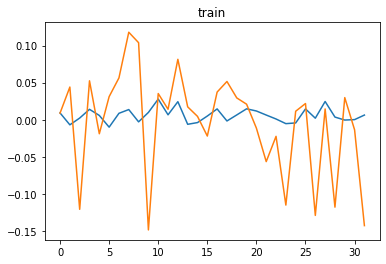

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


0.03857630051300953


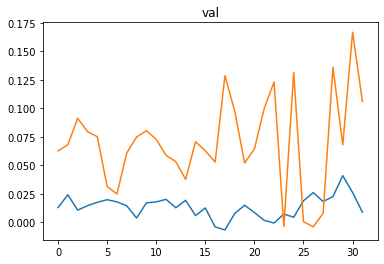

0.011539768364469884

epochs 61


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


0.03855099074738513
0.01151182085780774

epochs 62
0.03862383384820663
0.011484121872206866

epochs 63
0.03859851951921131
0.011456644636089518

epochs 64
0.038622281061793294
0.011429361367629747

epochs 65
0.0386215017316479
0.011402248831118568

epochs 66
0.038547104604112245
0.011375285306219327

epochs 67
0.038595399203186276
0.011348455134084669

epochs 68
0.03859461545008138
0.011321746696860103

epochs 69
0.038495676724359384
0.011295154438180438

epochs 70
0.03847035390047358
0.011268680378542109

epochs 71
0.038567725166789586
0.011242334620427277

epochs 72
0.03849332754781399
0.011216142925165467

epochs 73
0.03849254847508952
0.011190126507969226

epochs 74
0.03839361761240665
0.011164323253146672

epochs 75
0.03836830609163959
0.011138773570626469

epochs 76
0.03836753783059391
0.01111352292157836

epochs 77
0.03844038905187546
0.011088619797916735

epochs 78
0.03843962921551456
0.011064112186431885

epochs 79
0.03838979657322555
0.011040044538045333

epochs 80


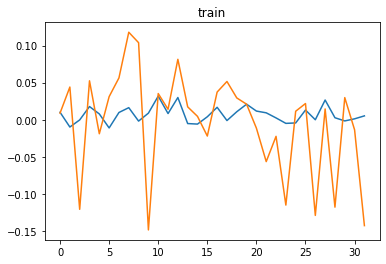

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


0.03836450672261987


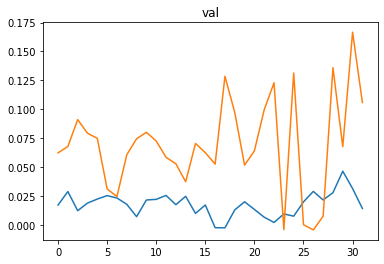

0.011016459788306284

epochs 81


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


0.03833922080353376
0.010993390265157667

epochs 82
0.03836301555341489
0.010970866781170084

epochs 83
0.038452680222324453
0.010948908531059653

epochs 84
0.038402864663424005
0.010927526122432644

epochs 85
0.03837758948581098
0.010906732688515873

epochs 86
0.03835231571231208
0.010886522167820042

epochs 87
0.038351581126603605
0.010866890519352282

epochs 88
0.03835084684511985
0.010847821579141131

epochs 89
0.03847280546034089
0.010829304739580317

epochs 90
0.038447530680560206
0.01081132383669837

epochs 91
0.038446792935594935
0.010793851593793449

epochs 92
0.03847059180421084
0.010776868816149436

epochs 93
0.03846984863000427
0.010760343680947514

epochs 94
0.038469102296540915
0.010744260024216216

epochs 95
0.03856650648933324
0.01072858349751618

epochs 96
0.03859028897661764
0.010713288844641993

epochs 97
0.03858952787655402
0.0106983482837677

epochs 98
0.038564221293588316
0.010683735548439672

epochs 99
0.03856344638640243
0.010669422856831954

epochs 100


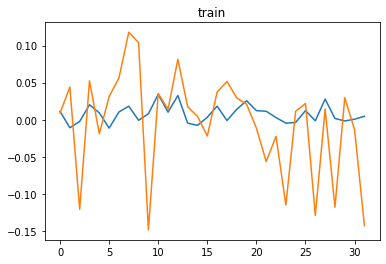

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


0.03851358591925176


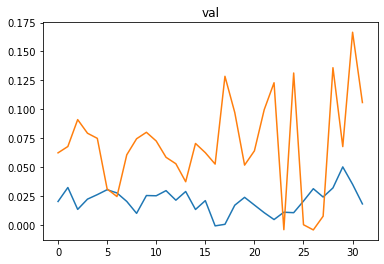

0.010655381416870375

epochs 101


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


0.03856187141498585
0.010641585467225415

epochs 102
0.03851199255394009
0.010628006215822898

epochs 103
0.0385357185256308
0.010614615880836875

epochs 104
0.038412200641669524
0.010601385670193171

epochs 105
0.0384113632046011
0.010588287802065834

epochs 106
0.038361433655035276
0.010575294999753014

epochs 107
0.03838510493648066
0.010562372409691245

epochs 108
0.038408758853714656
0.010549492755178677

epochs 109
0.038432393932417416
0.01053662219290006

epochs 110
0.038406931445979585
0.010523725364167812

epochs 111
0.03838144602567765
0.010510766405170248

epochs 112
0.038282320646384115
0.01049770339060638

epochs 113
0.038305861883459254
0.01048449490029933

epochs 114
0.0383784507460158
0.010471089411590058

epochs 115
0.038328314042812145
0.010457434391571303

epochs 116
0.03827814204954006
0.010443469730474182

epochs 117
0.03830154638548762
0.010429120669930668

epochs 118
0.03837398444618671
0.01041430740033166

epochs 119
0.038323679740727534
0.010398925360986742

ep

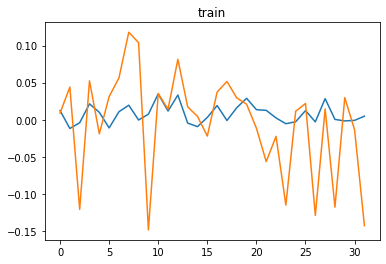

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


0.038371475013415396


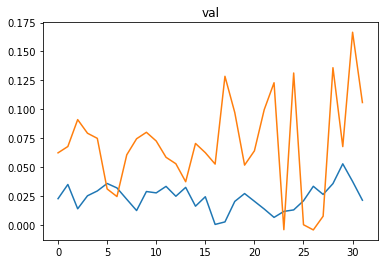

0.01038285483748226

epochs 121


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


0.038345591386346474
0.010365942272089295

epochs 122
0.038319636313270296
0.01034799319202617

epochs 123
0.03834267579016144
0.010328752509618209

epochs 124
0.0381938463386293
0.010307876740471792

epochs 125
0.03811851552200168
0.010284888542304605

epochs 126
0.038116655913249246
0.010259090843847242

epochs 127
0.03818822838439163
0.010229431471582187

epochs 128
0.038112324010544214
0.01019421371362977

epochs 129
0.03823238594839982
0.010150531590995143

epochs 130
0.03830284828010802
0.010093032808627113



In [ ]:
epochs=range(131)
group1_lstm.train()

for epoch in epochs:
    print('epochs',epoch)

    running_loss = 0
    test_loss = 0
    running_n = 0
    test_n = 0

    for i,data in enumerate(trainloader, 0):
        x,y = data
        x = x.to(device)
        y = y.to(device)

        optimizer.zero_grad()
        pred = group1_lstm(x)
        pred = pred.reshape(-1,1,1)
        #get training loss
        loss = criterion(pred.to(device), y)
        loss = torch.sqrt(loss)
        dir_loss = direct_loss(torch.tensor(pred>0, dtype=torch.float32), torch.tensor(y>0, dtype=torch.float32))*2
        loss = loss + dir_loss
        loss.backward()
        optimizer.step()
    
        running_loss += loss.item()
        running_n += len(pred)

        if (epoch%20==0)&(i==0):
            plt.plot(range(len(pred)), pred.data.reshape(-1).cpu(), range(len(pred)), y.data.reshape(-1).cpu())
            plt.title('train')
            plt.show()

    print(running_loss/running_n)

    with torch.no_grad():
        for j,data in enumerate(valloader, 0):
            x,y = data
            x = x.to(device)
            y = y.to(device)

            pred = group1_lstm(x)
            pred = pred.reshape(-1,1,1)
            #get training loss
            loss = criterion(pred.to(device), y)
            loss = torch.sqrt(loss)

            test_loss += loss.item()
            test_n += len(pred)

            if (epoch%20==0)&(j==0):
                plt.plot(range(len(pred)), pred.data.reshape(-1).cpu(), range(len(pred)), y.data.reshape(-1).cpu())
                plt.title('val')
                plt.show()

    print(test_loss/test_n)
    print()


In [ ]:
model_save_name = 'group1_lstm.pt'
path = F"/content/gdrive/My Drive/{model_save_name}"
group1_lstm.load_state_dict(torch.load(path))

<All keys matched successfully>

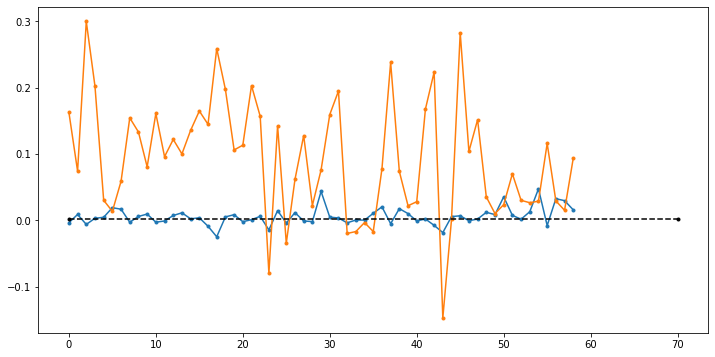

In [ ]:
x,y = next(iter(testloader))
x = group1_lstm(x.to(device)).data.reshape(-1).cpu()
x = np.expm1(x)
y = y.data.reshape(-1).cpu()
y = np.expm1(y)
plt.figure(figsize = (12,6))
plt.plot(range(len(x)), x, range(len(x)), y, [0,70], [0.002,0.002], '--k', marker='.')

In [ ]:
# model_save_name = 'group1_lstm.pt'
# path = F"/content/gdrive/My Drive/{model_save_name}" 
# torch.save(group1_lstm.state_dict(), path)

# foreign model

In [ ]:
group2 = train[train['group']==2].reset_index(drop=True)
group2_val = val[val['group']==2].reset_index(drop=True)
group2_test = test[test['group']==2].reset_index(drop=True)


train_data = []
val_data = []
test_data = []

for i in range(len(group2)): 
    
    temp_x = torch.tensor(group2.iloc[i,:-4],dtype=torch.float32).reshape(-1,1)
    temp_y = torch.tensor(group2.iloc[i,-4],dtype=torch.float32).reshape(-1,1)
    train_data.append([temp_x, temp_y])

for i in range(len(group2_val)):
    temp_x = torch.tensor(group2_val.iloc[i,:-4],dtype=torch.float32).reshape(-1,1)
    temp_y = torch.tensor(group2_val.iloc[i,-4],dtype=torch.float32).reshape(-1,1)
    val_data.append([temp_x, temp_y])

for i in range(len(group2_test)):
    temp_x = torch.tensor(group2_test.iloc[i,:-4],dtype=torch.float32).reshape(-1,1)
    temp_y = torch.tensor(group2_test.iloc[i,-4],dtype=torch.float32).reshape(-1,1)
    test_data.append([temp_x, temp_y])

trainloader = torch.utils.data.DataLoader(train_data, batch_size=32, num_workers=1, drop_last=False, shuffle=False)
valloader = torch.utils.data.DataLoader(val_data, batch_size=32, num_workers=1, drop_last=False, shuffle=False)
testloader = torch.utils.data.DataLoader(test_data, batch_size=1000, num_workers=1, drop_last=False, shuffle=False)

In [ ]:
group2_lstm = LSTM_pred().to(device)

In [ ]:
criterion = nn.MSELoss(reduction='sum').to(device)
# criterion = nn.L1Loss(reduction='sum').to(device)
direct_loss = nn.L1Loss(reduction='mean').to(device)
optimizer = torch.optim.Adam(group2_lstm.parameters(), lr=0.0005, weight_decay=2e-5) 

epochs 0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


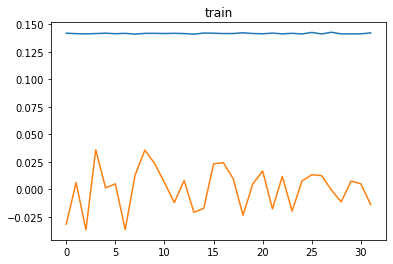

0.07881385087966919


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


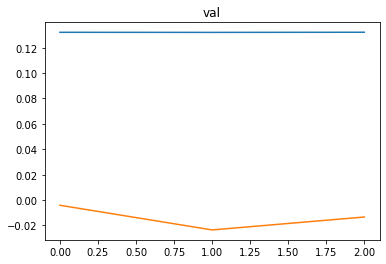

0.0842972199122111

epochs 1
0.07675551374753316


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


0.07881209750970204

epochs 2
0.07476834456125896
0.07335490485032399

epochs 3
0.07279078827963935
0.06787748634815216

epochs 4
0.07080769538879395
0.06235059599081675

epochs 5
0.06881039010153876
0.05675118168195089

epochs 6
0.06679298480351765
0.05105811357498169

epochs 7
0.06475131048096551
0.04525048534075419

epochs 8
0.06268331408500671
0.03930813322464625

epochs 9
0.06059145596292284
0.03321343412001928

epochs 10
0.058488418658574425
0.026956213017304737

epochs 11
0.056412425306108266
0.0205513338247935

epochs 12
0.0544737610552046
0.014108433077732721

epochs 13
0.052991424997647606
0.008151978254318237

epochs 14
0.06647899415757921
0.004646309030552705

epochs 15
0.06711542275216845
0.004916336387395859

epochs 16
0.06779606805907355
0.005518907060225804

epochs 17
0.06803157594468859
0.005164850192765395

epochs 18
0.06783304611841838
0.004506045952439308

epochs 19
0.06738019320699903
0.004876372093955676

epochs 20


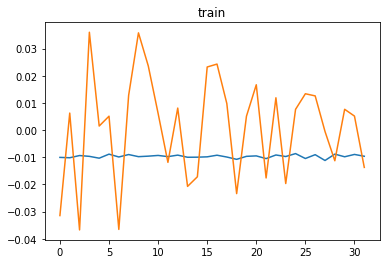

0.06689869695239598


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


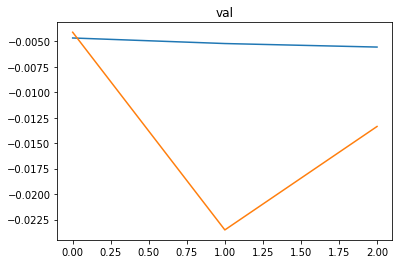

0.006637481351693471

epochs 21
0.06658728917439778


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


0.008843597024679184

epochs 22
0.050896253850724965
0.010735437273979187

epochs 23
0.05272891455226474
0.01196535180012385

epochs 24
0.05284613702032301
0.01245092103878657

epochs 25
0.05289266175693936
0.01225701222817103

epochs 26
0.05285020338164435
0.01152815173069636

epochs 27
0.052750794423951045
0.010458442072073618

epochs 28
0.05264852113193936
0.009273461376627287

epochs 29
0.021340008618103132
0.008198102315266928

epochs 30
0.06647761331664191
0.007404206941525142

epochs 31
0.06651047534412807
0.006970002005497615

epochs 32
0.06654137704107496
0.006889297937353452

epochs 33
0.06654817197057936
0.007109352697928746

epochs 34
0.06653174426820543
0.007548760001858075

epochs 35
0.06650756465064155
0.008098679905136427

epochs 36
0.06649096806844075
0.008637431388099989

epochs 37
0.040445559554629855
0.009059237937132517

epochs 38
0.05086634556452433
0.00929779683550199

epochs 39
0.04913375112745497
0.009335041046142578

epochs 40


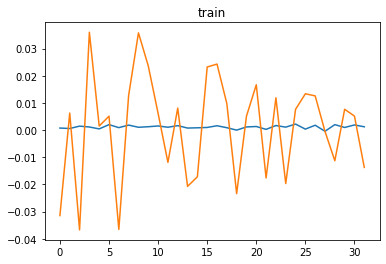

0.05086773633956909


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


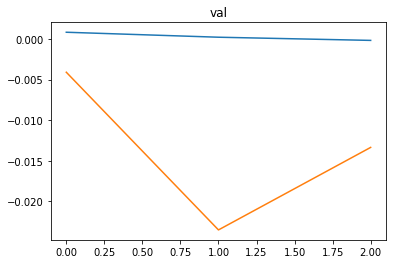

0.00919682780901591

epochs 41
0.035235726171069674


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


0.008940273274978002

epochs 42
0.036964346965154014
0.008637274925907453

epochs 43
0.04043260051144494
0.00835723802447319

epochs 44
0.06300249695777893
0.008152667433023453

epochs 45
0.0664775205983056
0.008051288624604544

epochs 46
0.0664798186884986
0.008054871732989946

epochs 47
0.06648010015487671
0.008143524949749311

epochs 48
0.06474260158008999
0.008282920345664024

epochs 49
0.05085190965069665
0.008433155715465546

epochs 50
0.042170037825902305
0.008558125545581182

epochs 51
0.026544233991040125
0.008632967248558998

epochs 52
0.024807327323489718
0.008648265153169632

epochs 53
0.023070056301852066
0.008609731992085775

epochs 54
0.038693636655807495
0.008534534523884455

epochs 55
0.040428499380747475
0.008445478354891142

epochs 56
0.04042775432268778
0.008364645143349966

epochs 57
0.04389974309338464
0.008308390155434608

epochs 58
0.045635845926072865
0.00828449179728826

epochs 59
0.04563574492931366
0.008291732519865036

epochs 60


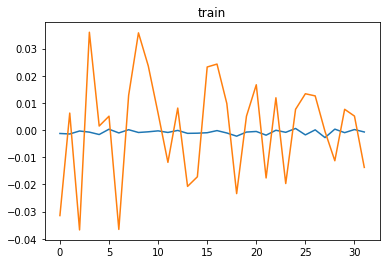

0.04563538730144501


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


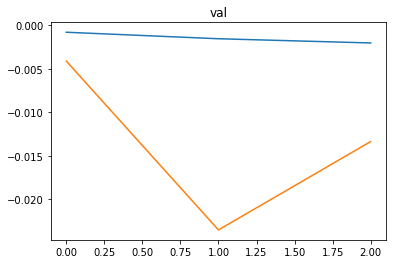

0.00832161990304788

epochs 61
0.043898695045047335


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


0.008361630141735077

epochs 62
0.04042576915687985
0.008398832132418951

epochs 63
0.04042500754197439
0.008423132201035818

epochs 64
0.04042420287926992
0.008429335430264473

epochs 65
0.04042336510287391
0.008417696381608645

epochs 66
0.04042253726058536
0.008392962316672007

epochs 67
0.03868566453456879
0.008362396930654844

epochs 68
0.038685015506214566
0.008333524689078331

epochs 69
0.04042057858573066
0.008312116066614786

epochs 70
0.04042008022467295
0.0083009855200847

epochs 71
0.040419568618138633
0.008299758036931356

epochs 72
0.04041900402969784
0.008305472632249197

epochs 73
0.04041837321387397
0.008313803002238274

epochs 74
0.03868157664934794
0.008320445194840431

epochs 75
0.0386808498038186
0.008322309081753096

epochs 76
0.040416210889816284
0.008318083360791206

epochs 77
0.04041545920901828
0.00830838829278946

epochs 78
0.040414722429381475
0.008295231188337008

epochs 79
0.04041401710775164
0.008281252657373747

epochs 80


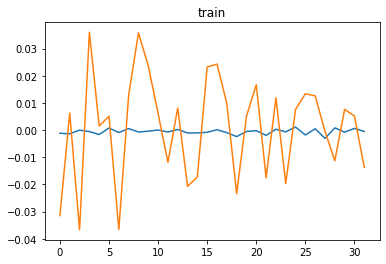

0.03867722882164849


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


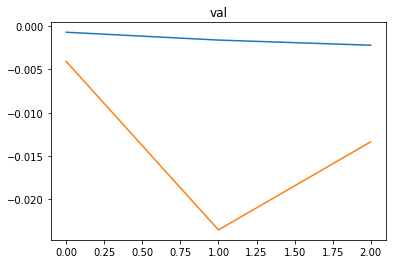

0.008268832539518675

epochs 81
0.03867657151487139


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


0.008259482681751251

epochs 82
0.038675917519463435
0.008253575613101324

epochs 83
0.03867524696720971
0.008250406632820765

epochs 84
0.04041066765785217
0.008248568822940191

epochs 85
0.04040995240211487
0.008246536056200663

epochs 86
0.040409213966793485
0.00824307215710481

epochs 87
0.04040846394168006
0.00823754072189331

epochs 88
0.04040770563814375
0.008230051646629969

epochs 89
0.040406953957345754
0.008221261203289032

epochs 90
0.04040620724360148
0.008212092642982801

epochs 91
0.04040546715259552
0.008203397194544474

epochs 92
0.040404735340012446
0.008195717508594194

epochs 93
0.04040399690469106
0.008189191420873007

epochs 94
0.040403253502315946
0.00818353829284509

epochs 95
0.04040249851014879
0.008178255831201872

epochs 96
0.04040172861682044
0.008172795176506042

epochs 97
0.04040094878938463
0.00816672295331955

epochs 98
0.040400163994895086
0.008159895117084185

epochs 99
0.040399372577667236
0.00815238431096077

epochs 100


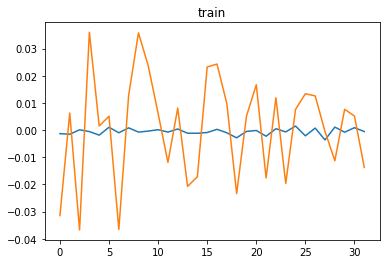

0.04039858116043939


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


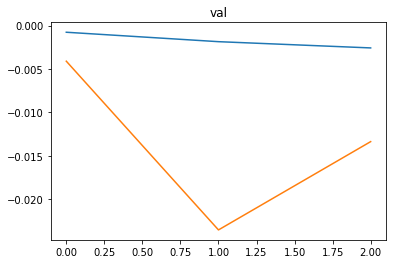

0.008144492904345194

epochs 101
0.04039779139889611


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


0.0081365288545688

epochs 102
0.04039699832598368
0.008128798256317774

epochs 103
0.0403962019417021
0.008121417835354805

epochs 104
0.040395402246051364
0.008114395663142204

epochs 105
0.040394597583346896
0.008107583969831467

epochs 106
0.04039378464221954
0.0081007598588864

epochs 107
0.040392963422669306
0.008093728373448053

epochs 108
0.04039213558038076
0.008086395139495531

epochs 109
0.04039130277103848
0.008078766365845999

epochs 110
0.04039046665032705
0.008070894206563631

epochs 111
0.04038962721824646
0.008062941953539848

epochs 112
0.04038878447479672
0.00805501826107502

epochs 113
0.040387936764293246
0.008047189563512802

epochs 114
0.04038708574242062
0.008039452135562897

epochs 115
0.04038622809780969
0.008031756927569708

epochs 116
0.040385367141829595
0.008024028191963831

epochs 117
0.04038449625174204
0.008016206324100494

epochs 118
0.04038362536165449
0.008008219301700592

epochs 119
0.0403827428817749
0.008000098168849945

epochs 120


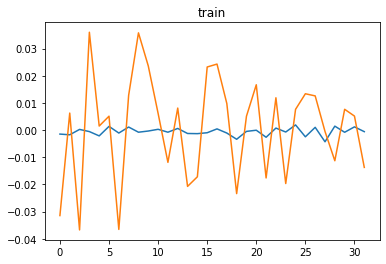

0.04038185874621073


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


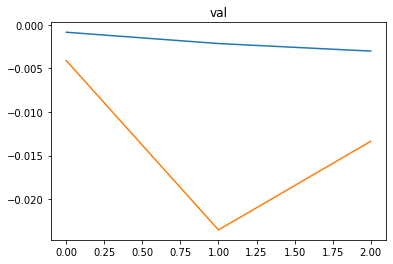

0.007991831749677658

epochs 121
0.04038097129927741


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


0.00798350820938746

epochs 122
0.04038007722960578
0.007975138102968534

epochs 123
0.040379179848565
0.007966786623001099

epochs 124
0.04037827750047048
0.007958417137463888

epochs 125
0.04037736852963766
0.007950019712249437

epochs 126
0.03864034513632456
0.007941565786798796

epochs 127
0.0386394245756997
0.007933024937907854

epochs 128
0.03863850070370568
0.007924377918243408

epochs 129
0.038637570208973356
0.007915627211332321

epochs 130
0.03863663640287188
0.007906801377733549

epochs 131
0.03863569597403208
0.007897904142737389

epochs 132
0.03863475388950772
0.007888970275719961

epochs 133
0.03863380352656046
0.00787998673816522

epochs 134
0.03863284819655948
0.007870942975083986

epochs 135
0.03863188955518934
0.007861855129400889

epochs 136
0.038630922635396324
0.007852684085567793

epochs 137
0.03862995240423414
0.007843437294165293

epochs 138
0.03862897555033366
0.007834092403451601

epochs 139
0.038627993729379445
0.007824670523405075

epochs 140


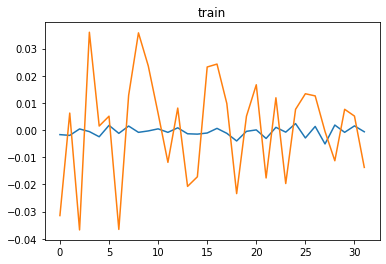

0.03862700694137149


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


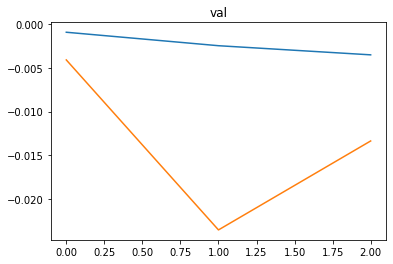

0.007815167307853699

epochs 141
0.03862601684199439


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


0.007805618147055308

epochs 142
0.03862502011987898
0.007795981441934903

epochs 143
0.03862401677502526
0.0077862851321697235

epochs 144
0.03862300846311781
0.007776524871587753

epochs 145
0.03862199683984121
0.007766694451371829

epochs 146
0.03862097693814172
0.007756781453887622

epochs 147
0.03861995538075765
0.007746772840619087

epochs 148
0.038618925544950694
0.007736685375372569

epochs 149
0.03861789239777459
0.007726514711976051

epochs 150
0.038616852627860174
0.007716264575719833

epochs 151
0.038615809546576604
0.007705959801872571

epochs 152
0.03861475818687015
0.00769556500017643

epochs 153
0.03861370517147912
0.0076850975553194685

epochs 154
0.0386126438776652
0.0076745375990867615

epochs 155
0.03861157761679755
0.007663906241456668

epochs 156
0.03861050804456075
0.007653173680106799

epochs 157
0.03860943350527021
0.00764236847559611

epochs 158
0.038608350687556796
0.007631481935580571

epochs 159
0.03860726455847422
0.007620513439178467

epochs 160


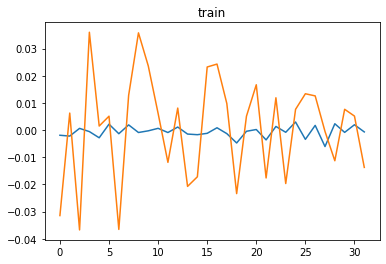

0.038606175118022494


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


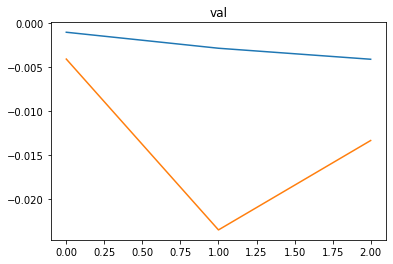

0.0076094505687554674

epochs 161
0.03860507905483246


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


0.007598297670483589

epochs 162
0.03860397802458869
0.0075870851675669355

epochs 163
0.038602872027291193
0.0075757720818122225

epochs 164
0.03860175940725538
0.007564362759391467

epochs 165
0.038600645131535
0.0075528814146916074

epochs 166
0.03859952257739173
0.007541306937734286

epochs 167
0.03859839836756388
0.007529637465874354

epochs 168
0.03859726753499773
0.00751787672440211

epochs 169
0.03859613173537784
0.00750603216389815

epochs 170
0.0385949926243888
0.007494087641437848

epochs 171
0.03859384689066145
0.007482079168160756

epochs 172
0.03859269784556495
0.007469964524110158

epochs 173
0.038591545489099294
0.007457766681909561

epochs 174
0.03859038485421075
0.0074454595645268755

epochs 175
0.038589224219322205
0.007433065523703893

epochs 176
0.03858805696169535
0.007420582075913747

epochs 177
0.03858688804838392
0.007408011704683304

epochs 178
0.03858571085664961
0.0073953357835610705

epochs 179
0.03858453200923072
0.007382594669858615

epochs 180


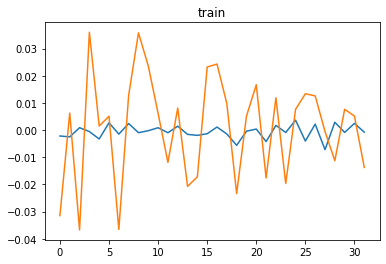

0.03858334985044268


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


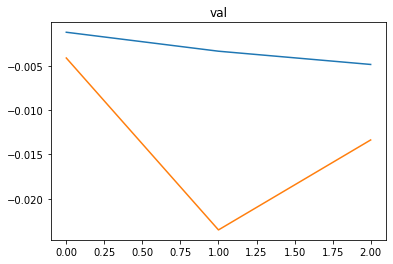

0.007369753594199817

epochs 181
0.038582162724600896


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


0.007356815040111542

epochs 182
0.03858097063170539
0.007343777765830358

epochs 183
0.038579776883125305
0.007330639287829399

epochs 184
0.038578579823176064
0.007317403331398964

epochs 185
0.03857737614048852
0.007304097215334575

epochs 186
0.02468728305151065
0.007290696104367574

epochs 187
0.024686074815690517
0.007277211795250575

epochs 188
0.024684863371981516
0.007263620694478353

epochs 189
0.024683648409942787
0.007249938324093819

epochs 190
0.024682430860896904
0.007236151024699211

epochs 191
0.03857009775108761
0.007222284873326619

epochs 192
0.03856887585586972
0.007208333661158879

epochs 193
0.038567650649282664
0.00719428372879823

epochs 194
0.03856642213132647
0.007180145631233851

epochs 195
0.038565190302001104
0.007165929923454921

epochs 196
0.03856395681699117
0.007151616737246513

epochs 197
0.03856272498766581
0.007137199863791466

epochs 198
0.038561486535602145
0.007122695446014404

epochs 199
0.038560249739223056
0.007108120868603389

epochs 200


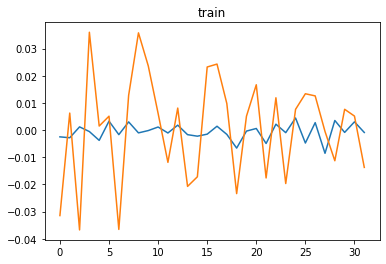

0.038559009631474815


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


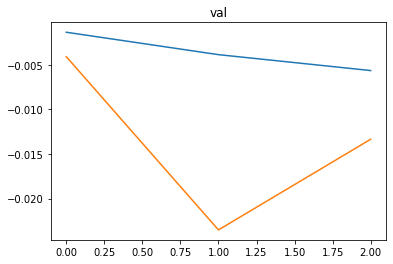

0.007093452538053195

epochs 201
0.03855776786804199


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


0.007078707839051883

epochs 202
0.03855652610460917
0.007063879321018855

epochs 203
0.03855528268549177
0.0070489551872015

epochs 204
0.0385540376106898
0.007033944750825564

epochs 205
0.03855279253588782
0.007018858566880226

epochs 206
0.03855154580540127
0.007003686701258023

epochs 207
0.0385503007305993
0.0069884515057007475

epochs 208
0.03854905234442817
0.006973146150509517

epochs 209
0.03854780561394162
0.0069577402124802274

epochs 210
0.03854655888345507
0.006942270944515864

epochs 211
0.03854531215296851
0.006926720341046651

epochs 212
0.03854406542248196
0.00691108653942744

epochs 213
0.03854281869199541
0.006895406171679497

epochs 214
0.03854157361719343
0.0068796556442976

epochs 215
0.03854033019807604
0.006863828127582868

epochs 216
0.03853908677895864
0.006847946594158809

epochs 217
0.03853784335984124
0.00683199055492878

epochs 218
0.038536603252092995
0.0068159811198711395

epochs 219
0.03853536480002933
0.006799908354878426

epochs 220


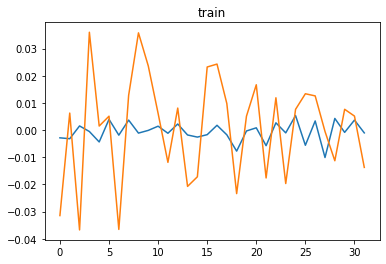

0.03853412800365024


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


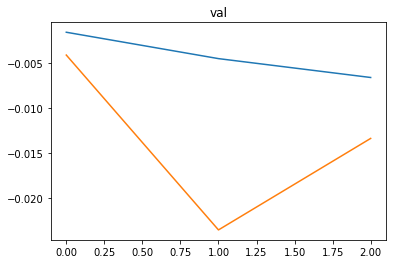

0.006783769155542056

epochs 221
0.03853289120727115


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


0.0067675889780124026

epochs 222
0.038531659377945796
0.00675136037170887

epochs 223
0.03853042589293586
0.006735075265169144

epochs 224
0.03852919737497965
0.006718744213382403

epochs 225
0.03852796885702345
0.006702342381079991

epochs 226
0.0385267436504364
0.006685921301444371

epochs 227
0.03852552672227224
0.006669461727142334

epochs 228
0.03852430648273892
0.006652958070238431

epochs 229
0.03852308955457476
0.006636412193377812

epochs 230
0.0385218792491489
0.006619843343893687

epochs 231
0.038520668943723045
0.00660323662062486

epochs 232
0.038519465261035495
0.006586605062087377

epochs 233
0.038518263234032526
0.006569941217700641

epochs 234
0.038517066174083285
0.006553263093034427

epochs 235
0.0385158724255032
0.006536574413379033

epochs 236
0.03851468198829227
0.006519868349035581

epochs 237
0.038513494862450495
0.006503130619724591

epochs 238
0.03851231104797787
0.0064863841980695724

epochs 239
0.03851113385624356
0.006469620391726494

epochs 240


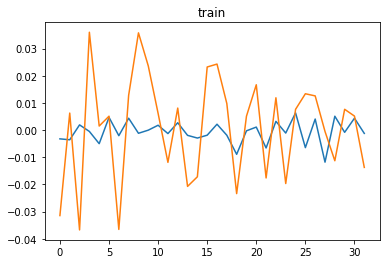

0.03850996163156298


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


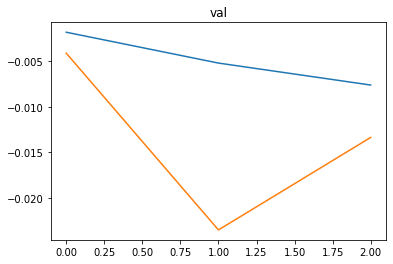

0.006452885766824086

epochs 241
0.038508791062566966


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


0.006436144312222798

epochs 242
0.03677151434951358
0.0064193929235140485

epochs 243
0.03677035371462504
0.00640262911717097

epochs 244
0.03676919804679023
0.00638589325050513

epochs 245
0.036768045690324574
0.006369154279430707

epochs 246
0.03676689830091265
0.006352428967754046

epochs 247
0.03676575587855445
0.006335728491346042

epochs 248
0.03676461842324999
0.006319049745798111

epochs 249
0.036763484279314675
0.006302397698163986

epochs 250
0.0367623551024331
0.006285756826400757

epochs 251
0.03676123089260525
0.006269128993153572

epochs 252
0.036760113305515714
0.006252545863389969

epochs 253
0.03675899737411075
0.006236004953583081

epochs 254
0.03675788640975952
0.0062194882581631345

epochs 255
0.0367567820681466
0.006203027442097664

epochs 256
0.03675567772653368
0.0061865802854299545

epochs 257
0.03675458331902822
0.006170188387235005

epochs 258
0.036753490567207336
0.006153830016652743

epochs 259
0.03675240112675561
0.006137533113360405

epochs 260


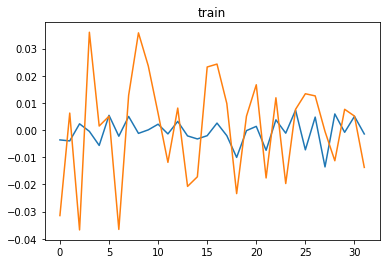

0.036751314997673035


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


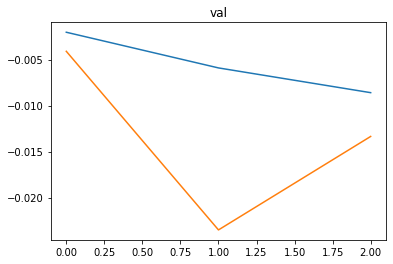

0.0061212945729494095

epochs 261
0.03675023549132877


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


0.006105099494258563

epochs 262
0.03674915929635366
0.0060889652619759245

epochs 263
0.0367480864127477
0.006072873870531718

epochs 264
0.0367470168405109
0.006056829666097959

epochs 265
0.036745952235327825
0.006040868038932483

epochs 266
0.03674489094151391
0.006024974087874095

epochs 267
0.03674382964769999
0.006009140983223915

epochs 268
0.03674277663230896
0.005993374312917392

epochs 269
0.03674172196123335
0.0059776535878578825

epochs 270
0.036740672257211476
0.005962003643314044

epochs 271
0.03673962420887417
0.00594644621014595

epochs 272
0.036738581127590604
0.005930956453084946

epochs 273
0.036737538046307035
0.005915528784195582

epochs 274
0.03673649662070804
0.005900172516703606

epochs 275
0.036735458506478205
0.005884888892372449

epochs 276
0.03673442370361752
0.005869667356212934

epochs 277
0.036733388900756836
0.005854543919364612

epochs 278
0.03673235575358073
0.0058394962300856905

epochs 279
0.036731322606404625
0.005824512491623561

epochs 280


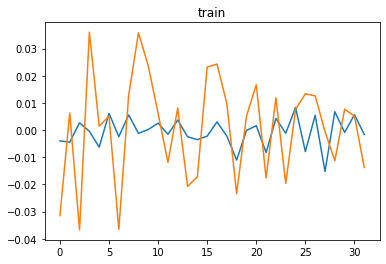

0.03673029111491309


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


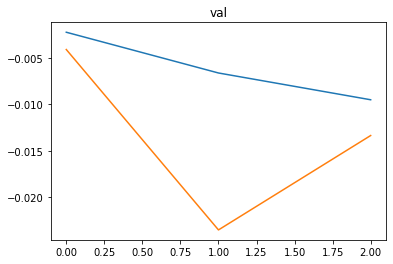

0.005809603879849116

epochs 281
0.036729259623421565


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


0.0057947685321172076

epochs 282
0.036728229787614614
0.005779997756083806

epochs 283
0.036727196640438504
0.005765306452910106

epochs 284
0.036726170116000705
0.00575071449081103

epochs 285
0.036725140280193753
0.005736185858647029

epochs 286
0.03672410878870222
0.005721690754095714

epochs 287
0.03672307895289527
0.005707300578554471

epochs 288
0.036722044150034584
0.0056929755955934525

epochs 289
0.0367210093471739
0.005678740640481313

epochs 290
0.0367199761999978
0.005664553493261337

epochs 291
0.03671893974145254
0.005650424088040988

epochs 292
0.036717901627222695
0.005636363600691159

epochs 293
0.03671686020162371
0.0056223707894484205

epochs 294
0.036715818776024714
0.005608459934592247

epochs 295
0.03671477238337199
0.0055945875744024915

epochs 296
0.03671372433503469
0.005580775439739227

epochs 297
0.03671267463101281
0.005567007387677829

epochs 298
0.0367116199599372
0.005553308253486951

epochs 299
0.03671056032180786
0.005539659410715103

epochs 300


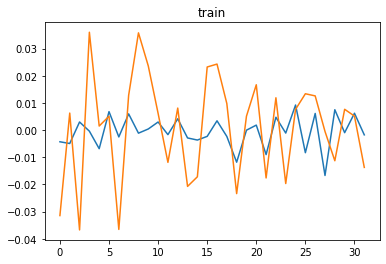

0.03670949902799395


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


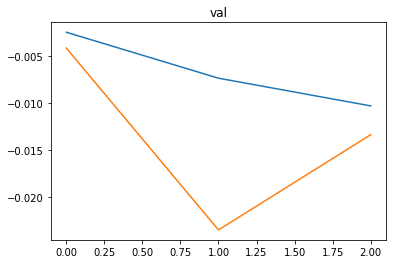

0.00552606334288915



In [ ]:
epochs=range(301) #301
group2_lstm.train()

for epoch in epochs:
    print('epochs',epoch)

    running_loss = 0
    test_loss = 0
    running_n = 0
    test_n = 0

    for i,data in enumerate(trainloader, 0):
        x,y = data
        x = x.to(device)
        y = y.to(device)

        optimizer.zero_grad()
        pred = group2_lstm(x)
        pred = pred.reshape(-1,1,1)

        #get training loss
        loss = criterion(pred.to(device), y)
        loss = torch.sqrt(loss)
        dir_loss = direct_loss(torch.tensor(pred>0, dtype=torch.float32), torch.tensor(y>0, dtype=torch.float32))*2
        loss = loss + dir_loss
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        running_n += len(pred)

        if (epoch%20==0)&(i==0):
            plt.plot(range(len(pred)), pred.data.reshape(-1).cpu(), range(len(pred)), y.data.reshape(-1).cpu())
            plt.title('train')
            plt.show()

    print(running_loss/running_n)

    with torch.no_grad():
        for j,data in enumerate(valloader, 0):
            x,y = data
            x = x.to(device)
            y = y.to(device)

            pred = group2_lstm(x)
            pred = pred.reshape(-1,1,1)
            #get training loss
            loss = criterion(pred.to(device), y)
            loss = torch.sqrt(loss)

            test_loss += loss.item()
            test_n += len(pred)

            if (epoch%20==0)&(j==0):
                plt.plot(range(len(pred)), pred.data.reshape(-1).cpu(), range(len(pred)), y.data.reshape(-1).cpu())
                plt.title('val')
                plt.show()

    print(test_loss/test_n)
    print()


In [ ]:
model_save_name = 'group2_lstm.pt'
path = F"/content/gdrive/My Drive/{model_save_name}"
group2_lstm.load_state_dict(torch.load(path))

<All keys matched successfully>

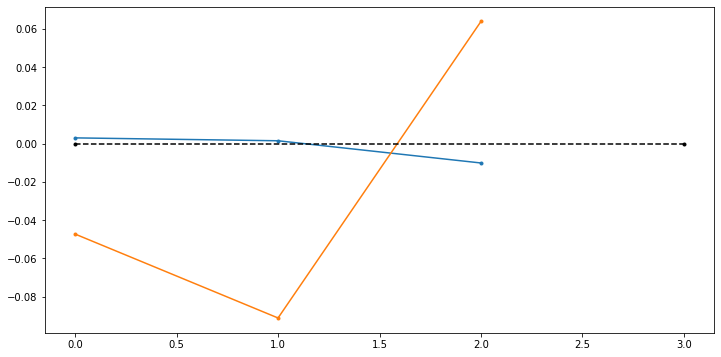

In [ ]:
x,y = next(iter(testloader))
x = group2_lstm(x.to(device)).data.reshape(-1).cpu()
x = np.expm1(x)
y = y.data.reshape(-1).cpu()
y = np.expm1(y)
plt.figure(figsize = (12,6))
plt.plot(range(len(x)), x, range(len(x)), y, [0,len(x)], [0, 0], '--k', marker='.')

In [ ]:
# model_save_name = 'group2_lstm.pt'
# path = F"/content/gdrive/My Drive/{model_save_name}" 
# torch.save(group2_lstm.state_dict(), path)

# bonds model

In [ ]:
group3 = train[train['group']==3].reset_index(drop=True)
group3_val = val[val['group']==3].reset_index(drop=True)
group3_test = test[test['group']==3].reset_index(drop=True)


train_data = []
val_data = []
test_data = []

for i in range(len(group3)): 
    
    temp_x = torch.tensor(group3.iloc[i,:-4],dtype=torch.float32).reshape(-1,1)
    temp_y = torch.tensor(group3.iloc[i,-4],dtype=torch.float32).reshape(-1,1)
    train_data.append([temp_x, temp_y])

for i in range(len(group3_val)):
    temp_x = torch.tensor(group3_val.iloc[i,:-4],dtype=torch.float32).reshape(-1,1)
    temp_y = torch.tensor(group3_val.iloc[i,-4],dtype=torch.float32).reshape(-1,1)
    val_data.append([temp_x, temp_y])

for i in range(len(group3_test)):
    temp_x = torch.tensor(group3_test.iloc[i,:-4],dtype=torch.float32).reshape(-1,1)
    temp_y = torch.tensor(group3_test.iloc[i,-4],dtype=torch.float32).reshape(-1,1)
    test_data.append([temp_x, temp_y])

trainloader = torch.utils.data.DataLoader(train_data, batch_size=32, num_workers=1, drop_last=False)
valloader = torch.utils.data.DataLoader(val_data, batch_size=32, num_workers=1, drop_last=False)
testloader = torch.utils.data.DataLoader(test_data, batch_size=1000, num_workers=1, drop_last=False)

In [ ]:
group3_lstm = LSTM_pred().to(device)

In [ ]:
criterion = nn.MSELoss(reduction='sum').to(device)
direct_loss = nn.L1Loss(reduction='mean').to(device)
optimizer = torch.optim.Adam(group3_lstm.parameters(), lr=0.0005, weight_decay=2e-4)

epochs 0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


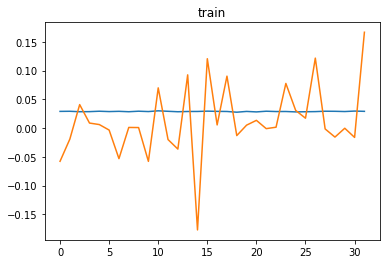

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


0.036614825328191124


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:50: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


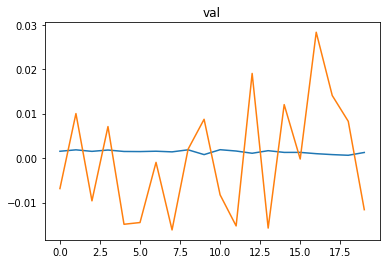

0.05794329047203064

epochs 1
0.03945524073564089


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


0.05836641788482666

epochs 2


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:50: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


0.03657806913057963
0.059592777490615846

epochs 3
0.036556633619161755
0.05899392366409302

epochs 4
0.03652105843409514
0.0583624005317688

epochs 5
0.03654584823510586
0.05856395363807678

epochs 6
0.036540704659926586
0.05898310542106629

epochs 7
0.036531452185068376
0.05887007713317871

epochs 8
0.03652217296453623
0.05860946774482727

epochs 9
0.03652805854112674
0.05865289568901062

epochs 10
0.0365287680656482
0.05881005525588989

epochs 11
0.03652413686116537
0.05878428220748901

epochs 12
0.03652040507548895
0.05868698358535766

epochs 13
0.036521376707614996
0.05869998335838318

epochs 14
0.03652105423120352
0.058756041526794436

epochs 15
0.036518318530840754
0.058744406700134276

epochs 16
0.03651612729598314
0.05870908498764038

epochs 17
0.03651548654605181
0.058715426921844484

epochs 18
0.036514289486102566
0.05873385667800903

epochs 19
0.036512166261672974
0.05872632265090942

epochs 20


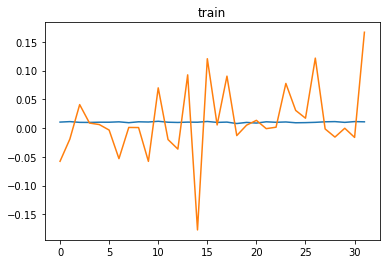

0.03651032921595451


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:50: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


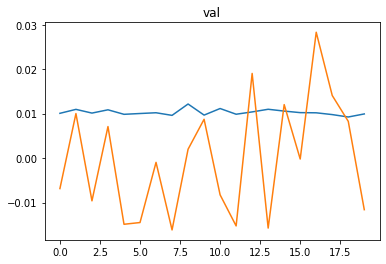

0.058713263273239134

epochs 21
0.03650895487039517


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


0.05871603488922119

epochs 22


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:50: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


0.03650726301547808
0.05872054696083069

epochs 23
0.03650521735350291
0.05871513485908508

epochs 24
0.03650327408925081
0.0587094247341156

epochs 25
0.03650140456664257
0.058709359169006346

epochs 26
0.03649931802199437
0.05870840549468994

epochs 27
0.036497053427573964
0.05870373845100403

epochs 28
0.036494764379965954
0.05869957208633423

epochs 29
0.03649238592539078
0.05869696736335754

epochs 30
0.03648981528404432
0.05869312882423401

epochs 31
0.03648707805535732
0.058687740564346315

epochs 32
0.03648420556997641
0.05868242979049683

epochs 33
0.03648113975158104
0.05867694020271301

epochs 34
0.0364778343683634
0.058670175075531

epochs 35
0.03647428483535082
0.0586622953414917

epochs 36
0.03647046517103146
0.05865368843078613

epochs 37
0.03646631844532795
0.058643889427185056

epochs 38
0.03646179498770298
0.05863243341445923

epochs 39
0.03645685544380775
0.058619332313537595

epochs 40


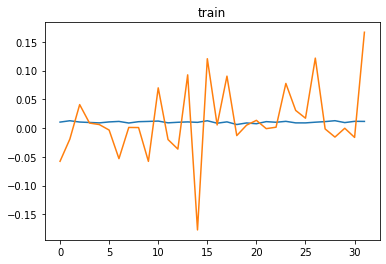

0.03645143027489002


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:50: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


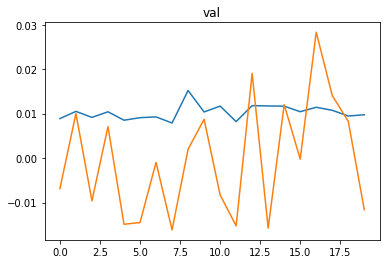

0.05860444903373718

epochs 41
0.03644544306473854


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


0.05858733057975769

epochs 42


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:50: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


0.03643881434049362
0.05856769680976868

epochs 43
0.03643145087437752
0.05854538083076477

epochs 44
0.03642323842415443
0.058520054817199706

epochs 45
0.03641404326145466
0.05849137306213379

epochs 46
0.03640371331801781
0.05845908522605896

epochs 47
0.036392055260829434
0.05842294692993164

epochs 48
0.036378829525067255
0.05838271379470825

epochs 49
0.036363738851669505
0.058338284492492676

epochs 50
0.035945747143183
0.05828973650932312

epochs 51
0.03592561643857222
0.05823730826377869

epochs 52
0.03504346349300482
0.05818161368370056

epochs 53
0.03461463061662821
0.05812358856201172

epochs 54
0.034179613376275085
0.05306446552276611

epochs 55
0.03413631213016999
0.05300594568252563

epochs 56
0.033220480649899214
0.037951937317848204

epochs 57
0.033138612524057046
0.03792199790477753

epochs 58
0.03340819286994445
0.03803718984127045

epochs 59
0.03184900069848085
0.03403426706790924

epochs 60


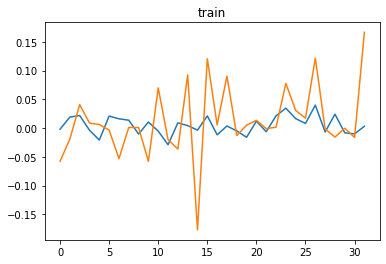

0.027024991237200223


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:50: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


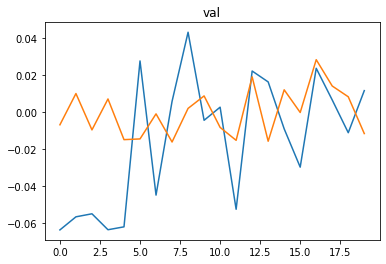

0.058338046073913574

epochs 61
0.027315316291955802


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


0.03391374349594116

epochs 62


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:50: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


0.026979691707170926
0.04217864871025086

epochs 63
0.026327870595149506
0.04232424795627594

epochs 64
0.026910447921508398
0.047253796458244325

epochs 65
0.02684127825957078
0.04263900816440582

epochs 66
0.025983186868520882
0.03767933249473572

epochs 67
0.02811129582233918
0.037617072463035583

epochs 68
0.026335940529138614
0.037721821665763856

epochs 69
0.025964370522743616
0.03759259879589081

epochs 70
0.0259455144405365
0.03755571246147156

epochs 71
0.02474227127356407
0.03754664063453674

epochs 72
0.025547459721565247
0.037562710046768186

epochs 73
0.026331299772629373
0.037654027342796326

epochs 74
0.025933658083279926
0.03765444159507751

epochs 75
0.025528139410874784
0.03762469589710236

epochs 76
0.025922927718896132
0.03760688602924347

epochs 77
0.02592282111828144
0.037595659494400024

epochs 78
0.025916470166964408
0.037621089816093446

epochs 79
0.02591346433529487
0.03764038681983948

epochs 80


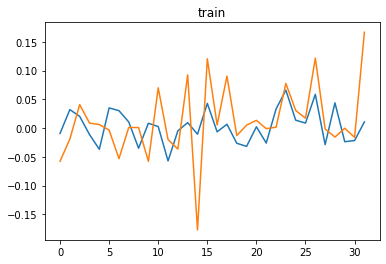

0.02591108091366597


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:50: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


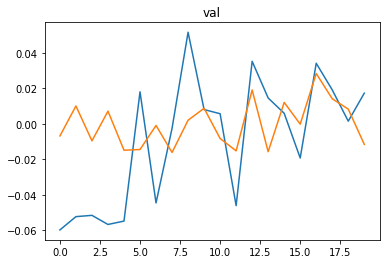

0.037641727924346925

epochs 81
0.025906498997639388


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


0.03764192759990692

epochs 82


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:50: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


0.025903846973027937
0.03763794600963592

epochs 83
0.025900359719227523
0.03764028549194336

epochs 84
0.025896719250923548
0.03764795958995819

epochs 85
0.02589397438061543
0.03765258193016052

epochs 86
0.025890579972511683
0.03765705525875092

epochs 87
0.025887341453478888
0.03766050934791565

epochs 88
0.025884276017164573
0.03766302466392517

epochs 89
0.025880951911975175
0.037666916847229004

epochs 90
0.02587785514501425
0.03767070770263672

epochs 91
0.02587475150059431
0.03767446577548981

epochs 92
0.025871541255559675
0.042678695917129514

epochs 93
0.02586842003541115
0.04268266260623932

epochs 94
0.0258652422672663
0.042686671018600464

epochs 95
0.025862048451717082
0.04269076585769653

epochs 96
0.02585888711305765
0.042694729566574094

epochs 97
0.025855674957617734
0.04269889295101166

epochs 98
0.025852448283097684
0.042703211307525635

epochs 99
0.025849205561173268
0.04270758330821991

epochs 100


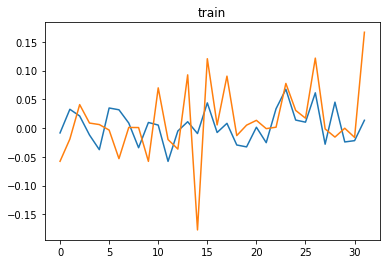

0.02584592157449478


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:50: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


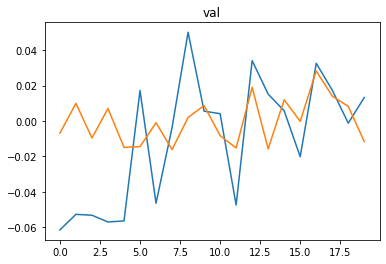

0.04271206259727478

epochs 101
0.02584261504503397


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


0.04271656274795532

epochs 102


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:50: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


0.025839276038683377
0.04272111058235169

epochs 103
0.025835891564687092
0.042725777626037596

epochs 104
0.025832470792990465
0.04273054301738739

epochs 105
0.025829002261161804
0.0427354097366333

epochs 106
0.02582548329463372
0.04274038076400757

epochs 107
0.02582191465756832
0.04274542927742005

epochs 108
0.025818286797939204
0.04275057315826416

epochs 109
0.025814598569503196
0.04275583028793335

epochs 110
0.025810846915611856
0.04276119470596314

epochs 111
0.025807025340887215
0.04276667237281799

epochs 112
0.026261006410305317
0.0427722692489624

epochs 113
0.026257035823968742
0.042777979373931886

epochs 114
0.026252983472286127
0.042783820629119874

epochs 115
0.026248846298609026
0.04278979003429413

epochs 116
0.025843977546080563
0.04279589653015137

epochs 117
0.025439012891206987
0.04280215501785278

epochs 118
0.025434590302980863
0.04280856251716614

epochs 119
0.025430063406626385
0.042815136909484866

epochs 120


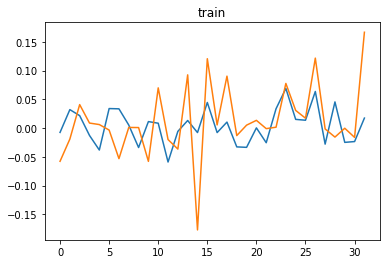

0.025425426088846646


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:50: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


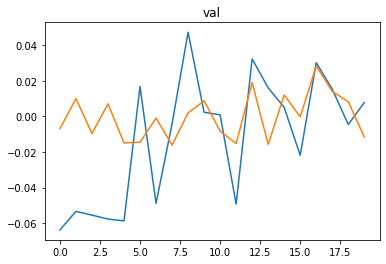

0.042821881175041196

epochs 121
0.02542067376466898


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


0.042828810214996335

epochs 122


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:50: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


0.02495792546333411
0.042835935950279236

epochs 123
0.0249529263147941
0.04284326732158661

epochs 124
0.024947793055803347
0.04285081923007965

epochs 125
0.024942523011794455
0.0378586083650589

epochs 126
0.02533774536389571
0.037866649031639096

epochs 127
0.025332174240014493
0.03787495493888855

epochs 128
0.025326443024170704
0.03788354098796844

epochs 129
0.02532054331058111
0.03789241909980774

epochs 130
0.025314465165138245
0.03790160715579986

epochs 131
0.025308202092464153
0.03791112005710602

epochs 132
0.02530174148388398
0.04292096793651581

epochs 133
0.02489443429005452
0.042931169271469116

epochs 134
0.024887551481907185
0.042941713333129884

epochs 135
0.0248804394251261
0.04295261800289154

epochs 136
0.024873086657279577
0.042963871359825136

epochs 137
0.02486547751304431
0.04297547340393067

epochs 138
0.0252582427018728
0.042987394332885745

epochs 139
0.02525008336091653
0.04299961030483246

epochs 140


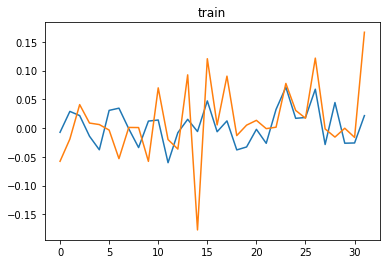

0.0252416240863311


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:50: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


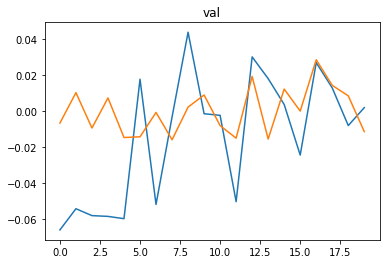

0.04301207959651947

epochs 141
0.02523285074111743


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


0.043024730682373044

epochs 142


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:50: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


0.025223745367465876
0.04303749799728394

epochs 143
0.025214289625485737
0.04305025935173035

epochs 144
0.025204469378177937
0.043062877655029294

epochs 145
0.02479362143920018
0.043075191974639895

epochs 146
0.024783014104916498
0.04308696985244751

epochs 147
0.024771991066443615
0.043097969889640805

epochs 148
0.024760535512215052
0.04310786724090576

epochs 149
0.02474863712604229
0.04311630129814148

epochs 150
0.02427840958803128
0.04312286376953125



In [ ]:
epochs=range(151)
group3_lstm.train()

for epoch in epochs:
    print('epochs',epoch)

    running_loss = 0
    test_loss = 0
    running_n = 0
    test_n = 0

    for i,data in enumerate(trainloader, 0):
        x,y = data
        x = x.to(device)
        y = y.to(device)

        optimizer.zero_grad()
        pred = group3_lstm(x)
        pred = pred.reshape(-1,1,1)

        #get training loss
        loss = criterion(pred.to(device), y)
        loss = torch.sqrt(loss)
        dir_loss = direct_loss(torch.tensor(pred>0, dtype=torch.float32), torch.tensor(y>0, dtype=torch.float32))*2
        loss = loss + dir_loss
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        running_n += len(pred)

        if (epoch%20==0)&(i==0):
            plt.plot(range(len(pred)), pred.data.reshape(-1).cpu(), range(len(pred)), y.data.reshape(-1).cpu())
            plt.title('train')
            plt.show()

    print(running_loss/running_n)

    with torch.no_grad():
        for j,data in enumerate(valloader, 0):
            x,y = data
            x = x.to(device)
            y = y.to(device)

            pred = group3_lstm(x)
            pred = pred.reshape(-1,1,1)
            #get training loss
            loss = criterion(pred.to(device), y)
            loss = torch.sqrt(loss)
            dir_loss = direct_loss(torch.tensor(pred>0, dtype=torch.float32), torch.tensor(y>0, dtype=torch.float32))*2
            loss = loss + dir_loss

            test_loss += loss.item()
            test_n += len(pred)

            if (epoch%20==0)&(j==0):
                plt.plot(range(len(pred)), pred.data.reshape(-1).cpu(), range(len(pred)), y.data.reshape(-1).cpu())
                plt.title('val')
                plt.show()

    print(test_loss/test_n)
    print()


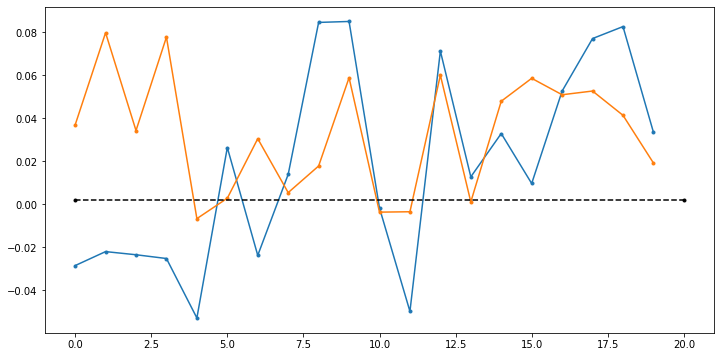

In [ ]:
x,y = next(iter(testloader))
x = group3_lstm(x.to(device)).data.reshape(-1).cpu()
x = np.expm1(x)
y = y.data.reshape(-1).cpu()
y = np.expm1(y)
plt.figure(figsize = (12,6))
plt.plot(range(len(x)), x, range(len(x)), y, [0,len(x)], [0.002,0.002], '--k', marker='.')

In [ ]:
model_save_name = 'group3_lstm.pt'
path = F"/content/gdrive/My Drive/{model_save_name}"
group3_lstm.load_state_dict(torch.load(path))

<All keys matched successfully>

In [ ]:
# model_save_name = 'group3_lstm.pt'
# path = F"/content/gdrive/My Drive/{model_save_name}" 
# torch.save(group3_lstm.state_dict(), path)

# futures model

In [ ]:
group4 = train[train['group']==4].reset_index(drop=True)
group4 = group4[~((group4['ETF']=='00672L 元大S&P原油正2')&(group4['date']=='2020/02'))].reset_index(drop=True)
group4 = group4[~((group4['ETF']=='00715L 街口布蘭特油正2')&(group4['date']=='2020/02'))].reset_index(drop=True)

group4_val = val[val['group']==4].reset_index(drop=True)
group4_test = test[test['group']==4].reset_index(drop=True)


train_data = []
val_data = []
test_data = []

for i in range(len(group4)): 
    
    temp_x = torch.tensor(group4.iloc[i,:-4],dtype=torch.float32).reshape(-1,1)
    temp_y = torch.tensor(group4.iloc[i,-4],dtype=torch.float32).reshape(-1,1)
    train_data.append([temp_x, temp_y])

for i in range(len(group4_val)):
    temp_x = torch.tensor(group4_val.iloc[i,:-4],dtype=torch.float32).reshape(-1,1)
    temp_y = torch.tensor(group4_val.iloc[i,-4],dtype=torch.float32).reshape(-1,1)
    val_data.append([temp_x, temp_y])

for i in range(len(group4_test)):
    temp_x = torch.tensor(group4_test.iloc[i,:-4],dtype=torch.float32).reshape(-1,1)
    temp_y = torch.tensor(group4_test.iloc[i,-4],dtype=torch.float32).reshape(-1,1)
    test_data.append([temp_x, temp_y])

trainloader = torch.utils.data.DataLoader(train_data, batch_size=32, num_workers=1, drop_last=False, shuffle=False)
valloader = torch.utils.data.DataLoader(val_data, batch_size=32, num_workers=1, drop_last=False, shuffle=False)
testloader = torch.utils.data.DataLoader(test_data, batch_size=1000, num_workers=1, drop_last=False, shuffle=False)

In [ ]:
group4_lstm = LSTM_pred().to(device)

In [ ]:
criterion = nn.MSELoss(reduction='sum').to(device)
direct_loss = nn.L1Loss(reduction='mean').to(device)
optimizer = torch.optim.Adam(group4_lstm.parameters(), lr=0.002, weight_decay=1e-4) 

epochs 0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


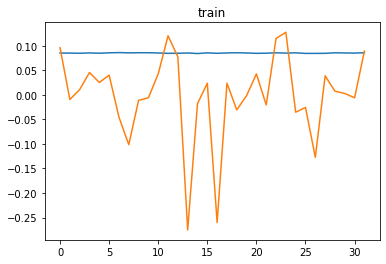

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


0.05571475877361589


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:49: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


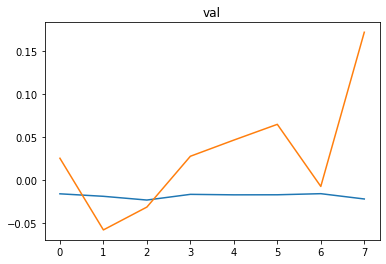

0.18528631329536438

epochs 1
0.06852731316588646


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


0.19310858845710754

epochs 2


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:49: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


0.06840884131054546
0.1846044808626175

epochs 3
0.05418145342896036
0.11862845718860626

epochs 4
0.052403254777395214
0.11954789608716965

epochs 5
0.06826757737832476
0.18469028174877167

epochs 6
0.06778519282969393
0.18526336550712585

epochs 7
0.06774573455485262
0.18392062187194824

epochs 8
0.0676922179007715
0.1826828420162201

epochs 9
0.06772135486898496
0.1823888123035431

epochs 10
0.06773887678634288
0.18282471597194672

epochs 11
0.06772698727689049
0.1834113746881485

epochs 12
0.06771796156269635
0.18360112607479095

epochs 13
0.06771061956420425
0.1833687573671341

epochs 14
0.06770807735679686
0.18308503925800323

epochs 15
0.06771347504253536
0.18301047384738922

epochs 16
0.06771741264550261
0.1831226944923401

epochs 17
0.067716636398966
0.1832493394613266

epochs 18
0.06771424482035082
0.18326765298843384

epochs 19
0.0677126498185387
0.18320085108280182

epochs 20


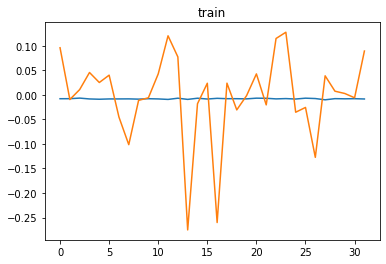

0.06771302962487982


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:49: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


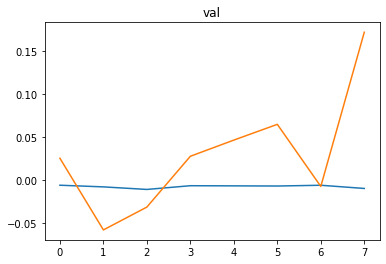

0.18314248323440552

epochs 21
0.06771435756091923


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


0.183140829205513

epochs 22


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:49: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


0.0677149027817009
0.18317219614982605

epochs 23
0.06771444812301518
0.1831909865140915

epochs 24
0.06771378461704698
0.1831812858581543

epochs 25
0.06771355451539506
0.1831609457731247

epochs 26
0.06771374118420505
0.1831510365009308

epochs 27
0.06771390197813049
0.1831539124250412

epochs 28
0.06771377907242886
0.18315841257572174

epochs 29
0.06771348243535952
0.1831560879945755

epochs 30
0.06771324124447135
0.18314862251281738

epochs 31
0.0677131220351818
0.18314212560653687

epochs 32
0.06771302777667378
0.18313920497894287

epochs 33
0.06771286883095438
0.18313775956630707

epochs 34
0.06771263688109642
0.18313495814800262

epochs 35
0.0677123929178992
0.1831304430961609

epochs 36
0.06771217575368955
0.18312568962574005

epochs 37
0.06771196505820104
0.18312178552150726

epochs 38
0.06771173218424006
0.18311843276023865

epochs 39
0.06771147528360057
0.18311482667922974

epochs 40


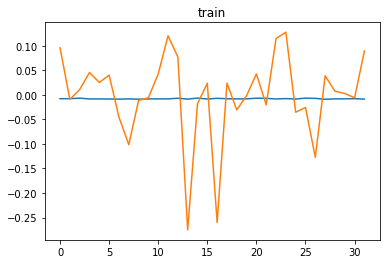

0.0677111962044886


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:49: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


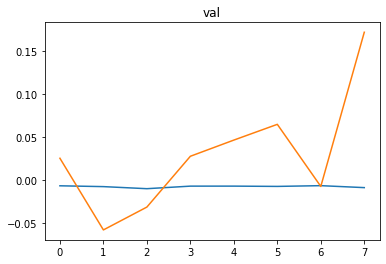

0.18311069905757904

epochs 41
0.06771091712537662


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


0.18310637772083282

epochs 42


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:49: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


0.06771063434985257
0.18310219049453735

epochs 43
0.0677103367886802
0.18309813737869263

epochs 44
0.06771002444185951
0.18309402465820312

epochs 45
0.06770969453708146
0.1830897182226181

epochs 46
0.06770935631537622
0.18308529257774353

epochs 47
0.06770900608033173
0.18308085203170776

epochs 48
0.06770864105963892
0.183076411485672

epochs 49
0.06770826310150382
0.18307188153266907

epochs 50
0.06770787035772043
0.18306727707386017

epochs 51
0.06770745913187663
0.1830625683069229

epochs 52
0.06770703404448754
0.18305779993534088

epochs 53
0.06770659601965616
0.18305297195911407

epochs 54
0.06770613674045534
0.1830480545759201

epochs 55
0.06770566082740015
0.18304306268692017

epochs 56
0.06770516550818155
0.18303796648979187

epochs 57
0.06770465170690255
0.1830327957868576

epochs 58
0.06770411572715108
0.18302753567695618

epochs 59
0.0677035557207211
0.18302218616008759

epochs 60


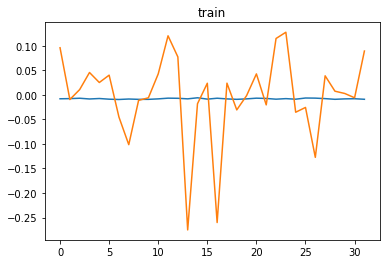

0.0677029763081277


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:49: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


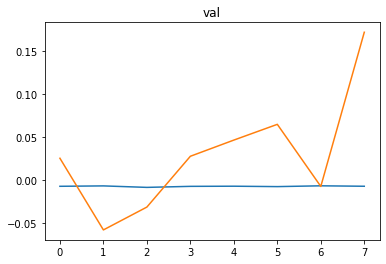

0.18301674723625183

epochs 61
0.06770237009654674


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


0.18301120400428772

epochs 62


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:49: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


0.06770173893418423
0.18300555646419525

epochs 63
0.06770107727642208
0.18299981951713562

epochs 64
0.06770038789556931
0.18299396336078644

epochs 65
0.06769966801931691
0.1829880326986313

epochs 66
0.06769891857176788
0.18298198282718658

epochs 67
0.06769813308420107
0.18297582864761353

epochs 68
0.06769730878430744
0.1829695701599121

epochs 69
0.06769645029260207
0.18296322226524353

epochs 70
0.06769554744395175
0.1829567849636078

epochs 71
0.06769460301066554
0.18295027315616608

epochs 72
0.06769361329633136
0.1829436719417572

epochs 73
0.06769257552864015
0.18293699622154236

epochs 74
0.0676914841629738
0.18293026089668274

epochs 75
0.06769034289574438
0.18292348086833954

epochs 76
0.0676891424859217
0.18291668593883514

epochs 77
0.06768788200940272
0.18290989100933075

epochs 78
0.06768655869387841
0.18290314078330994

epochs 79
0.06768516699473064
0.1828964501619339

epochs 80


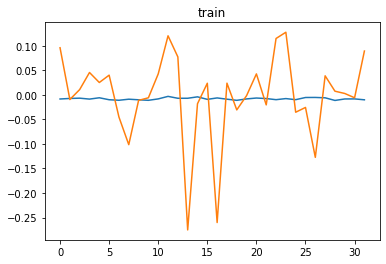

0.06768370413965033


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:49: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


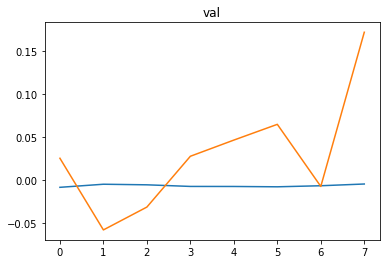

0.1828898787498474

epochs 81
0.06768216088760731


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


0.18288347125053406

epochs 82


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:49: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


0.06768054001091063
0.1828773021697998

epochs 83
0.06767883411673613
0.18287143111228943

epochs 84
0.06767702841943549
0.18286597728729248

epochs 85
0.06767512569131777
0.18286104500293732

epochs 86
0.06767311853955882
0.18285676836967468

epochs 87
0.06767099217851033
0.18285328149795532

epochs 88
0.06718424678772919
0.18285080790519714

epochs 89
0.06718186167783516
0.18284955620765686

epochs 90
0.06717932686325191
0.18284977972507477

epochs 91
0.06717663495115532
0.18285182118415833

epochs 92
0.06668927318365998
0.1828560084104538

epochs 93
0.06571722954742668
0.18286284804344177

epochs 94
0.0657139683878699
0.18287284672260284

epochs 95
0.06522598931955736
0.18288667500019073

epochs 96
0.06570675483969755
0.18290509283542633

epochs 97
0.06570275162541589
0.21417905390262604

epochs 98
0.0656984526981679
0.2142096906900406

epochs 99
0.06569382941075998
0.24549829959869385

epochs 100


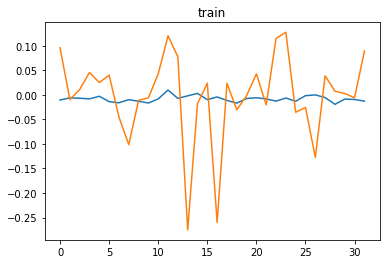

0.06617334646772044


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:49: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


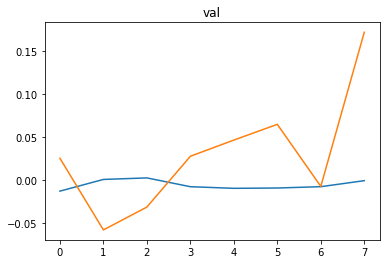

0.24554650485515594

epochs 101
0.06616798020148462


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


0.24560603499412537

epochs 102


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:49: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


0.0661621980888899
0.24567881226539612

epochs 103
0.06664048424062803
0.24576666951179504

epochs 104
0.06663384825684303
0.24587097764015198

epochs 105
0.06614232525344967
0.24599185585975647

epochs 106
0.06661947753078254
0.2461271435022354

epochs 107
0.06612744811893434
0.24627113342285156

epochs 108
0.06611984090287557
0.2464139312505722

epochs 109
0.06659670301186021
0.2465425431728363

epochs 110
0.05156952508385907
0.24664422869682312

epochs 111
0.051568719229928055
0.21625760197639465

epochs 112
0.06714637889418491
0.18595942854881287

epochs 113
0.06562699181164881
0.2146863043308258

epochs 114
0.05209240257783338
0.21475769579410553

epochs 115
0.0661541833433994
0.1859734058380127

epochs 116
0.06662078606065854
0.24697765707969666

epochs 117
0.06607868227847787
0.21430127322673798

epochs 118
0.053044001337198554
0.21475937962532043

epochs 119
0.0670710848283398
0.2471461147069931

epochs 120


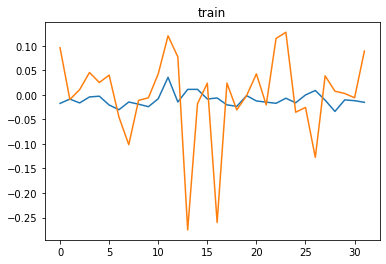

0.06656034048213515


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:49: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


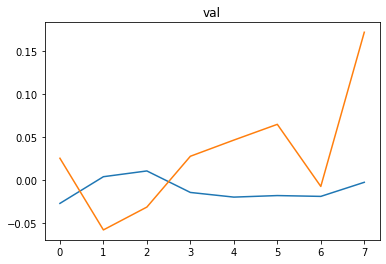

0.2473139613866806

epochs 121
0.050552473934150716


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


0.24674448370933533

epochs 122


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:49: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


0.05205415320301125
0.2472047507762909

epochs 123
0.0666064929592517
0.21732166409492493

epochs 124
0.06657221705414527
0.21534009277820587

epochs 125
0.05154604925015985
0.21483983099460602

epochs 126
0.06562102672665618
0.21675615012645721

epochs 127
0.06657133361165837
0.21581393480300903

epochs 128
0.065561151319696
0.21467366814613342

epochs 129
0.052516994820979906
0.21561932563781738

epochs 130
0.06610956857370776
0.2178095579147339



In [ ]:
epochs=range(131)
group4_lstm.train()
for epoch in epochs:
    print('epochs',epoch)

    running_loss = 0
    test_loss = 0
    running_n = 0
    test_n = 0

    for i,data in enumerate(trainloader, 0):
        x,y = data
        x = x.to(device)
        y = y.to(device)

        optimizer.zero_grad()
        pred = group4_lstm(x)
        pred = pred.reshape(-1,1,1)
        #get training loss
        loss = criterion(pred.to(device), y)
        loss = torch.sqrt(loss)
        dir_loss = direct_loss(torch.tensor(pred>0, dtype=torch.float32), torch.tensor(y>0, dtype=torch.float32))*2
        loss = loss + dir_loss
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        running_n += len(pred)

        if (epoch%20==0)&(i==0):
            plt.plot(range(len(pred)), pred.data.reshape(-1).cpu(), range(len(pred)), y.data.reshape(-1).cpu())
            plt.title('train')
            plt.show()

    print(running_loss/running_n)

    with torch.no_grad():
        for j,data in enumerate(valloader, 0):
            x,y = data
            x = x.to(device)
            y = y.to(device)

            pred = group4_lstm(x)
            pred = pred.reshape(-1,1,1)
            #get training loss
            loss = criterion(pred.to(device), y)

            loss = torch.sqrt(loss)
            dir_loss = direct_loss(torch.tensor(pred>0, dtype=torch.float32), torch.tensor(y>0, dtype=torch.float32))*2
            loss = loss + dir_loss      
            test_loss += loss.item()
            test_n += len(pred)

            if (epoch%20==0)&(j==0):
                plt.plot(range(len(pred)), pred.data.reshape(-1).cpu(), range(len(pred)), y.data.reshape(-1).cpu())
                plt.title('val')
                plt.show()

    print(test_loss/test_n)
    print()



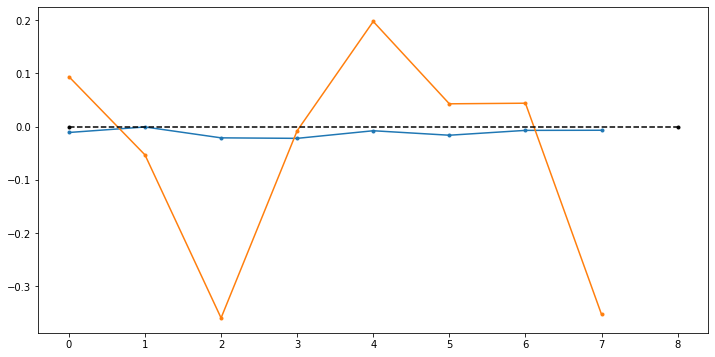

In [ ]:
x,y = next(iter(testloader))
x = group4_lstm(x.to(device)).data.reshape(-1).cpu()
x = np.expm1(x)
y = y.data.reshape(-1).cpu()
y = np.expm1(y)
plt.figure(figsize = (12,6))
plt.plot(range(len(x)), x, range(len(x)), y, [0,len(x)], [0, 0], '--k', marker='.')

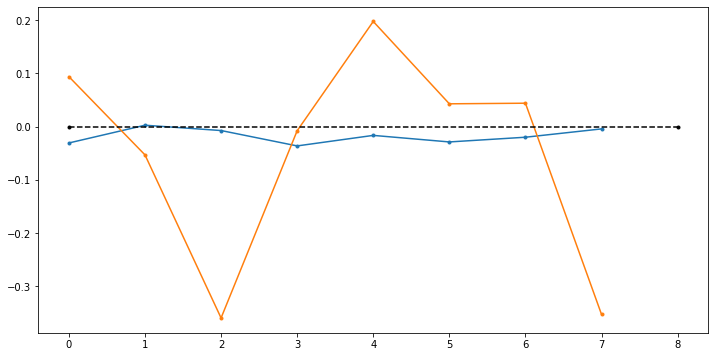

In [ ]:
x,y = next(iter(testloader))
x = group4_lstm(x.to(device)).data.reshape(-1).cpu()
x = np.expm1(x)
y = y.data.reshape(-1).cpu()
y = np.expm1(y)
plt.figure(figsize = (12,6))
plt.plot(range(len(x)), x, range(len(x)), y, [0,len(x)], [0, 0], '--k', marker='.')

In [ ]:
model_save_name = 'group4_lstm.pt'
path = F"/content/gdrive/My Drive/{model_save_name}"
group4_lstm.load_state_dict(torch.load(path))

<All keys matched successfully>

In [ ]:
# model_save_name = 'group4_lstm.pt'
# path = F"/content/gdrive/My Drive/{model_save_name}" 
# torch.save(group4_lstm.state_dict(), path)

# 組間模型

In [ ]:
eco = pd.read_csv('/content/gdrive/My Drive/總經.csv')

In [ ]:
eco['年月'] = eco['年月'].astype('str').apply(lambda x:datetime.datetime.strptime(x,'%Y/%m/%d').strftime('%Y/%m'))

In [ ]:
eco = eco.dropna()

In [ ]:
eco['消費支出'] = eco['消費支出'].apply(lambda x: x.replace(',','')).astype(float)
eco['新屋開工'] = eco['新屋開工'].apply(lambda x: x.replace(',','')).astype(float)

In [ ]:
test = eco.tail(4)
train = eco.iloc[:-4,:]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
minmax_col=[ '失業率', 'CPI年增率', '新屋開工', '製造業存貨', 'ISM', '消費支出', 'M1 YOY',
       'M2 YOY']


temp_train = pd.DataFrame(mms.fit_transform(train.loc[:,minmax_col]))
temp_train.columns=minmax_col
temp_test = pd.DataFrame(mms.transform(test.loc[:,minmax_col]))
temp_test.columns=minmax_col

In [ ]:
for col in [ '失業率', 'CPI年增率', '新屋開工', '製造業存貨', 'ISM', '消費支出', 'M1 YOY','M2 YOY']:
    test.loc[:,col] = temp_test.loc[:,col].values
    train.loc[:,col] = temp_train.loc[:,col].values

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [ ]:
mms_data = pd.concat([train, test]).reset_index(drop=True)

In [ ]:
def temporalize(X, y, lookback):
    output_X = []
    output_y = []
    for i in range(len(X)-lookback+1):
        t = []
        for j in range(1,lookback+1):
            # Gather past records upto the lookback period
            t.append(X.loc[[(i+j-1)], :].values)
        output_X.append(t)
        output_y.append(y[i+lookback-1])
    return output_X, output_y

In [ ]:
mms_data = mms_data[mms_data['年月']>'2018/08'].reset_index(drop=True)

In [ ]:
x, y = temporalize(mms_data.drop(['年月'], axis=1), mms_data['年月'], 6)

X = np.array(x)
X = X.reshape(len(x), 6, 8) #(序列數, 6, 8)

train_data = []
test_data = []
val_data = []
plot_data = []

for i in range(len(x)-1): 
    if (y[i+1]=='2020/05')|(y[i+1]=='2020/06'):
        temp_x=torch.tensor(X[i],dtype=torch.float32)
        test_data.append([temp_x, y[i+1]])
        plot_data.append([temp_x, y[i+1]])


    elif (y[i+1]=='2020/03')|(y[i+1]=='2020/04'):
        temp_x=torch.tensor(X[i],dtype=torch.float32)
        val_data.append([temp_x, y[i+1]])
        plot_data.append([temp_x, y[i+1]])

  
    else:
        temp_x=torch.tensor(X[i],dtype=torch.float32)
        train_data.append([temp_x, y[i+1]])


ecoloader = torch.utils.data.DataLoader(train_data, batch_size=1, num_workers=1, shuffle=False, drop_last=False)
ecoloader_val = torch.utils.data.DataLoader(val_data, batch_size=1, num_workers=1, shuffle=False, drop_last=False)
ecoloader_test = torch.utils.data.DataLoader(test_data, batch_size=1, num_workers=1, shuffle=False, drop_last=False)
ecoloader_plot = torch.utils.data.DataLoader(plot_data, batch_size=1, num_workers=1, shuffle=False, drop_last=False)


In [ ]:
class LSTM_pred(nn.Module):

    def __init__(self):
        super(LSTM_pred, self).__init__()
        
        self.lstm1 = nn.LSTM( input_size=8,      #input的維度, 此例每個hidden input就一個數字
                              hidden_size=32,    #幾個hidden unit
                              num_layers=1,      #hidden 有幾層
                              batch_first=True)
        
        self.lstm2 = nn.LSTM( input_size=32,     
                              hidden_size=16,   
                              num_layers=1,      
                              batch_first=True)
        
        
        nn.init.orthogonal_(self.lstm1.weight_ih_l0, gain=5/3)
        nn.init.orthogonal_(self.lstm1.weight_hh_l0, gain=5/3)

        nn.init.orthogonal_(self.lstm2.weight_ih_l0, gain=5/3)
        nn.init.orthogonal_(self.lstm2.weight_hh_l0, gain=5/3)

        self.out = nn.Linear(16, 4)

    def forward(self, x):
        out, _ = self.lstm1(x)
        out, _ = self.lstm2(out)
        out = self.out(out[:,-1,:])

        return out

In [ ]:
model2 = LSTM_pred().to(device)

## 算權重資料

In [ ]:
g = code_df.groupby('ETF')
val = g.tail(2)
train = code_df.iloc[~code_df.index.isin(val.index), :]
g = val.groupby('ETF')
test = g.tail(1)
val = val.iloc[~val.index.isin(test.index), :]

In [ ]:
scaler = MinMaxScaler()

mms_code = scaler.fit_transform(train.iloc[:,:64])
train.iloc[:,:64] = mms_code

mms_code = scaler.transform(val.iloc[:,:64])
val.iloc[:,:64] = mms_code

mms_code = scaler.transform(test.iloc[:,:64])
test.iloc[:,:64] = mms_code

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

In [ ]:
weight_data = pd.concat([train, val, test]).reset_index(drop=True)

In [ ]:
weight_data[weight_data['date']=='2019/03']['group'].value_counts()

1    45
4     3
3     2
2     2
Name: group, dtype: int64

In [ ]:
temp_weight_data = []

for i in range(len(weight_data)): 
    
    temp_x = torch.tensor(weight_data.iloc[i,:-4],dtype=torch.float32).reshape(-1,1)
    temp_y = torch.tensor(weight_data.iloc[i,-4],dtype=torch.float32).reshape(-1,1)
    temp_g = weight_data.iloc[i,-1]
    temp_weight_data.append([temp_x, temp_y, temp_g])

weight_data_loader = torch.utils.data.DataLoader(temp_weight_data, batch_size=1, num_workers=1, shuffle=False, drop_last=False)

In [ ]:
weight_list = []

group1_lstm.eval()
group2_lstm.eval()
group3_lstm.eval()
group4_lstm.eval()

with torch.no_grad():
    for j,data in enumerate(weight_data_loader, 0):
        x,y,g = data
        x = x.to(device)
        y = y.to(device)

        if g.item()==1:
            pred = group1_lstm(x)
        elif g.item()==2:
            pred = group2_lstm(x)
        elif g.item()==3:
            pred = group3_lstm(x)
        else:
            pred = group4_lstm(x)

        weight_list.append(pred.item())


In [ ]:
weight_data['weight'] = weight_list

In [ ]:
weight_data = weight_data[weight_data['date']>'2019/02'].reset_index(drop=True)

In [ ]:
weight_data

0         1         2  ...     date  group    weight
0     0.885531  0.244891  0.344987  ...  2019/03      1  0.029086
1     0.886031  0.328175  0.264782  ...  2019/04      1 -0.011726
2     0.893464  0.432111  0.137845  ...  2019/05      1  0.000953
3     0.883206  0.415685  0.110146  ...  2019/06      1 -0.011403
4     0.885571  0.293290  0.109941  ...  2019/07      1  0.006897
...        ...       ...       ...  ...      ...    ...       ...
1176  0.885269  0.436651  0.176828  ...  2020/06      3  0.032947
1177  0.888585  0.250081  0.632723  ...  2020/06      1 -0.008049
1178  0.849720  0.390527  0.370965  ...  2020/06      1  0.031939
1179  0.894236  0.509588  0.495537  ...  2020/06      1  0.029155
1180  0.862625  0.213990  0.162758  ...  2020/06      1  0.015582

[1181 rows x 69 columns]

### create weights

In [ ]:
# 這邊還是預測的報酬，尚未過softmax變權重

weight_data.loc[weight_data['weight']<0, 'weight'] = 0

for date in weight_data['date'].unique():
  for g in weight_data['group'].unique():
   weight_data.loc[(weight_data['date']==date)&(weight_data['group']==g)&(weight_data['weight']>0), 'weight'] = F.softmax(torch.tensor(weight_data.loc[(weight_data['date']==date)&(weight_data['group']==g)&(weight_data['weight']>0), 'weight'].values)).numpy()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  import sys


In [ ]:
weight_data['label'] = np.expm1(weight_data['label'])

In [ ]:
temp = weight_data.groupby(['date','group'], as_index=False)['label'].sum()

In [ ]:
revenue_list = []
for date in weight_data['date'].unique():
    print(date)
    for g in [1,2,3,4]:
        revenue_list.append(sum(weight_data[(weight_data['date']==date)&(weight_data['group']==g)]['weight']*weight_data[(weight_data['date']==date)&(weight_data['group']==g)]['label']))

2019/03
2019/04
2019/05
2019/06
2019/07
2019/08
2019/09
2019/10
2019/11
2019/12
2020/01
2020/02
2020/03
2020/04
2020/05
2020/06


In [ ]:
# 每個類別每個月各標的加權平均的報酬

temp['label'] = revenue_list

In [ ]:
(weight_data[weight_data['ETF']=='0050 元大台灣50']['label']).mean()/(weight_data[weight_data['ETF']=='0050 元大台灣50']['label']).std()

0.3156981938656038

Text(0.5, 1.0, '0050')

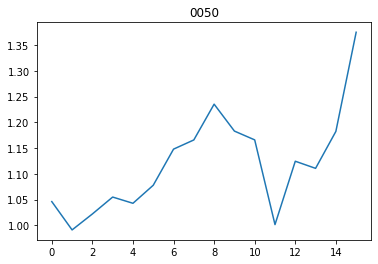

In [ ]:
plt.plot(range(16), (weight_data[weight_data['ETF']=='0050 元大台灣50']['label']+1).cumprod())
plt.title('0050')

In [ ]:
plt_df = temp.groupby(['date','group'],as_index=False)['label'].mean()

In [ ]:
temp.groupby(['date'])['label'].mean().mean()/temp.groupby(['date'])['label'].mean().std()

0.6300880755554177

Text(0.5, 1.0, 'equal weighted')

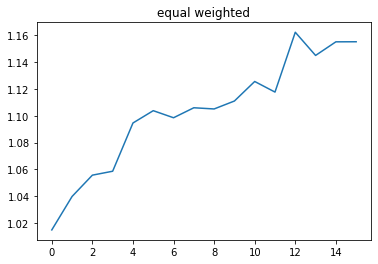

In [ ]:
plt.plot(range(16), (temp.groupby(['date'])['label'].mean()+1).cumprod())
plt.title('equal weighted')

In [ ]:
model2 = LSTM_pred().to(device)

In [ ]:
criterion = nn.MSELoss(reduction='sum').to(device)

optimizer = torch.optim.Adam(model2.parameters(), lr=0.0001, weight_decay=2e-5)

In [ ]:
epochs=range(101)
model2.train()
m = nn.Softmax(dim=1)

for epoch in epochs:
    print('epochs',epoch)

    running_loss = 0
    test_loss = 0
    running_n = 0
    test_n = 0

    for i,data in enumerate(ecoloader, 0):
    x,y = data
    x = x.to(device)

    optimizer.zero_grad()
    pred = model2(x)
    pred = m(pred)

    for i in range(len(pred)):
        out = torch.sum(torch.tensor(temp[temp['date']==y[i]]['label'].values).to(device)*pred[i]).view(1)
        if i==0:
            loss = criterion(out, torch.tensor([1],dtype=torch.double).to(device))
        else:
            loss = loss + criterion(out, torch.tensor([1],dtype=torch.double).to(device))

        loss.backward()
        optimizer.step()

    print('train')  
    print(y)
    print('before', torch.mean(torch.tensor(temp[temp['date']==y[i]]['label'].values)).item())
    print('after', out.item())
    print()
    if sum(sum(pred>0.4)).item()>0:
        break
  #   running_loss += loss.item()
  #   running_n += len(pred)

  # print(running_loss/running_n)

    with torch.no_grad():
        for j,data in enumerate(ecoloader_val, 0):
            x,y = data
            x = x.to(device)

            pred = model2(x)
            pred = m(pred)
            for i in range(len(pred)):
                out = torch.sum(torch.tensor(temp[temp['date']==y[i]]['label'].values).to(device)*pred[i]).view(1)
                if i==0:
                    loss = criterion(out, torch.tensor([1], dtype=torch.double).to(device))
                else:
                    loss = loss + criterion(out, torch.tensor([1],dtype=torch.double).to(device))

            test_loss += loss.item()
            test_n += len(pred)

    # print(test_loss/test_n)
    # print()
    print('val')
    print(y)
    print('before', torch.mean(torch.tensor(temp[temp['date']==y[i]]['label'].values)).item())
    print('after', out.item())
    print('-'*300)

epochs 0
train
('2020/02',)
before -0.007028008076290337
after -0.009993642866175528

val
('2020/04',)
before -0.014899871743200717
after -0.023034770869005784
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
epochs 1
train
('2020/02',)
before -0.007028008076290337
after -0.009898143975972034

val
('2020/04',)
before -0.014899871743200717
after -0.02281680881931133
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
epochs 2
train
('2020/02',)
before -0.007028008076290337
after -0.0097923930918

In [ ]:
before = []
after = []
weight = []

for i,data in enumerate(ecoloader_plot, 0):
    x,y = data
    x = x.to(device)

    pred = model2(x)
    pred = m(pred)
    print(y)
    print('before', torch.mean(torch.tensor(temp[temp['date']==y[0]]['label'].values)).item())
    before.append(torch.mean(torch.tensor(temp[temp['date']==y[0]]['label'].values)).item())
    out = torch.sum(torch.tensor(temp[temp['date']==y[0]]['label'].values).to(device)*pred[0]).view(1)
    after.append(out.item())
    weight.append(pred)
    print('after', out.item())
    print()

('2020/03',)
before 0.03996176387378886
after 0.047387920584552545

('2020/04',)
before -0.014899871743200717
after -0.0004886412656272792

('2020/05',)
before 0.008876353343596963
after 0.012684471420473277

('2020/06',)
before 4.610103527317479e-05
after 0.013431192067140184



In [ ]:
# model_save_name = 'model2.pt'
# path = F"/content/gdrive/My Drive/{model_save_name}" 
# torch.save(model2.state_dict(), path)

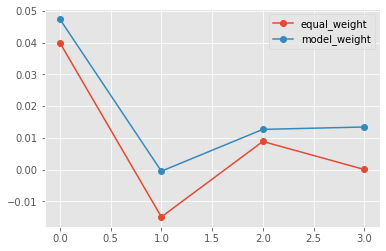

In [ ]:
plt.style.use('ggplot')
plt.plot(range(4), before, '-o', range(4), after, '-o')
plt.legend(['equal_weight','model_weight'])


In [ ]:
w = [[0.2680, 0.1688, 0.4102, 0.1530],[0.2685, 0.1664, 0.4144, 0.1508],
      [0.2715, 0.1633, 0.4183, 0.1469], [0.2714, 0.1590, 0.4247, 0.1449]]

In [ ]:
weight_data[(weight_data['date']=='2020/06')&(weight_data['group']==2)&(weight_data['weight']>0)]

0         1         2  ...     date  group    weight
1141  0.878946  0.234248  0.114097  ...  2020/06      2  0.500377
1142  0.879258  0.239217  0.111210  ...  2020/06      2  0.499623

[2 rows x 69 columns]

In [ ]:
before = []
after = []
weight = []

for i,data in enumerate(ecoloader_plot, 0):
    x,y = data
    x = x.to(device)

    pred = model2(x)
    pred = m(pred)
    print(y)
    print('before', torch.mean(torch.tensor(temp[temp['date']==y[0]]['label'].values)).item())
    before.append(torch.mean(torch.tensor(temp[temp['date']==y[0]]['label'].values)).item())
    out = sum(np.array(temp[temp['date']==y[0]]['label'].values)*w[i])
    after.append(out.item())
    weight.append(pred)
    print('after', out.item())
    print()

('2020/03',)
before 0.03996176387378886
after 0.049150069398696164

('2020/04',)
before -0.014899871743200717
after -0.0003685351190110143

('2020/05',)
before 0.008876353343596963
after 0.014176113850715249

('2020/06',)
before 4.610103527317479e-05
after 0.019911922882381087



## all plot


In [ ]:
x, y = temporalize(mms_data.drop(['年月'], axis=1), mms_data['年月'], 6)

X = np.array(x)
X = X.reshape(len(x), 6, 8) #(序列數, 6, 8)

all_plot = []

for i in range(len(x)-1): 
    temp_x=torch.tensor(X[i],dtype=torch.float32)
    all_plot.append([temp_x, y[i+1]])



all_loader = torch.utils.data.DataLoader(all_plot, batch_size=1, num_workers=1, shuffle=False, drop_last=False)

In [ ]:
before = []
after = []
weight = []
date = []
for i,data in enumerate(all_loader, 0):
    x,y = data
    x = x.to(device)

    pred = model2(x)
    pred = m(pred)
    print(y)
    date.append(y[0])
    print('before', torch.mean(torch.tensor(temp[temp['date']==y[0]]['label'].values)).item())
    before.append(torch.mean(torch.tensor(temp[temp['date']==y[0]]['label'].values)).item())
    out = torch.sum(torch.tensor(temp[temp['date']==y[0]]['label'].values).to(device)*pred[0]).view(1)
    after.append(out.item())
    weight.append(pred)
    print('after', out.item())
    print()

('2019/03',)
before 0.014814496637973913
after 0.014102759320132385

('2019/04',)
before 0.024610286625364033
after 0.04075813447449092

('2019/05',)
before 0.015294968119500972
after 0.016914316132197633

('2019/06',)
before 0.0027754790749727584
after 0.001244522622990641

('2019/07',)
before 0.03401396383923634
after 0.05738224988841986

('2019/08',)
before 0.008396807614764253
after 0.007881298104550783

('2019/09',)
before -0.004780758105487455
after -0.009584564107601496

('2019/10',)
before 0.006783787814285945
after 0.00814072624341071

('2019/11',)
before -0.0008017247230405946
after -0.008280103312802892

('2019/12',)
before 0.005354392707024751
after 0.01317117370688196

('2020/01',)
before 0.013131328612445686
after 0.019535229687233008

('2020/02',)
before -0.007028008076290337
after 0.008664848554636256

('2020/03',)
before 0.03996176387378886
after 0.04526078345813461

('2020/04',)
before -0.014899871743200717
after 0.0013232350633288353

('2020/05',)
before 0.0088763533

Text(0, 0.5, 'cumulative return')

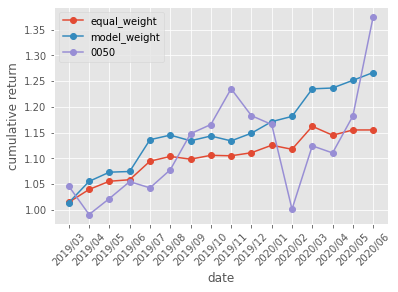

In [ ]:
plt.style.use('ggplot')
plt.plot(date, (np.array(before)+1).cumprod(), '-o', date, (np.array(after)+1).cumprod(), '-o', date, (weight_data[weight_data['ETF']=='0050 元大台灣50']['label']+1).cumprod(), '-o')
plt.legend(['equal_weight','model_weight','0050'])
plt.xticks(rotation=45)
plt.xlabel('date')
plt.ylabel('cumulative return')


In [ ]:
for g in [1,2,3,4]:
    print('group', g)
    print(weight_data[weight_data['group']==g]['ETF'].unique())
    print()

group 1
['0050 元大台灣50' '0051 元大中型100' '0052 富邦科技' '0053 元大電子' '0054 元大台商50'
 '0055 元大MSCI金融' '0056 元大高股息' '0057 富邦摩台' '0061 元大寶滬深' '006201 元大富櫃50'
 '006203 元大MSCI台灣' '006204 永豐臺灣加權' '006205 富邦上証' '006206 元大上證50'
 '006207 FH滬深' '006208 富邦台50' '00625K 富邦上証+R' '00631L 元大台灣50正2'
 '00633L 富邦上証正2' '00636 國泰中國A50' '00636K 國泰中國A50+U' '00637L 元大滬深300 正2'
 '00639 富邦深100' '00640L 富邦日本正2' '00643 群益深証中小' '00645 富邦日本'
 '00646 元大S&P500' '00647L 元大S&P500正2' '00650L FH香港正2' '00652 富邦印度'
 '00653L 富邦印度正2' '00655L 國泰中國A50正2' '00657 國泰日經225' '00657K 國泰日經225+U'
 '00660 元大歐洲50' '00661 元大日經225' '00662 富邦NASDAQ' '00663L 國泰臺灣加權正2'
 '00665L 富邦恒生國企正2' '00668 國泰美國道瓊' '00668K 國泰美國道瓊+U' '00670L 富邦NASDAQ正2'
 '00675L 富邦臺灣加權正2' '00677U 富邦VIX' '00678 群益NBI生技' '00685L 群益臺灣加權正2'
 '00690 兆豐藍籌30' '00692 富邦公司治理' '00700 富邦恒生國企' '00701 國泰股利精選30'
 '00702 國泰標普低波高息' '00703 台新MSCI中國' '00709 富邦歐洲' '00713 元大台灣高息低波'
 '00717 富邦美國特別股' '00728 第一金工業30' '00730 富邦臺灣優質高息' '00731 FH富時高息低波'
 '008201 BP上證50']

group 2
['00682U 元大美元指數' '00683L 

In [ ]:
plot_g = weight_data.groupby(['date', 'group'], as_index=False)['label'].mean()
plot_g.head()

date  group     label
0  2019/03      1  0.038146
1  2019/03      2  0.014410
2  2019/03      3 -0.030951
3  2019/03      4  0.055897
4  2019/04      1 -0.063794

In [ ]:
len(plot_g[plot_g['group']==g]['label'])

16

Text(0, 0.5, 'cumulative return')

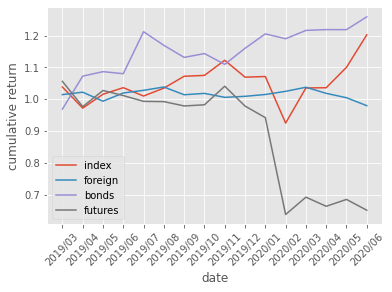

In [ ]:
for g in [1,2,3,4]:
    plt.plot(date, (plot_g[plot_g['group']==g]['label']+1).cumprod())
plt.legend(['index','foreign','bonds','futures']) 
plt.xticks(rotation=45)
plt.xlabel('date')
plt.ylabel('cumulative return')

Text(0, 0.5, 'cumulative return')

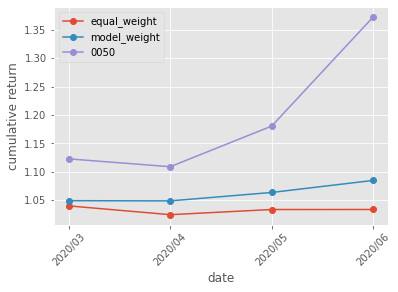

In [ ]:
#2020/03表3月底買進4月底賣出的報酬率...

plt.style.use('ggplot')
plt.plot(date[-4:], (np.array(before[-4:])+1).cumprod(), '-o', date[-4:], (np.array(after[-4:])+1).cumprod(), '-o', date[-4:], np.array(weight_data[weight_data['ETF']=='0050 元大台灣50']['label']+1)[-4:].cumprod(), '-o')
plt.legend(['equal_weight','model_weight','0050'])
plt.xticks(rotation=45)
plt.xlabel('date')
plt.ylabel('cumulative return')

In [ ]:
np.array(after[-4:]).mean()/np.array(after[-4:]).std()

1.1507573677982856

In [ ]:
np.array(weight_data[weight_data['ETF']=='0050 元大台灣50']['label'])[-4:].mean()/np.array(weight_data[weight_data['ETF']=='0050 元大台灣50']['label'])[-4:].std()

1.2819984130094473

Text(0, 0.5, 'return')

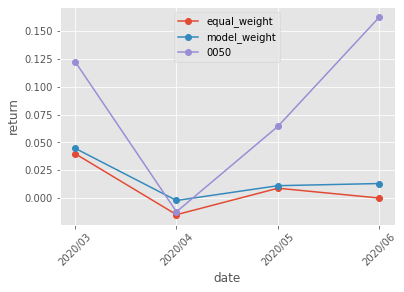

In [ ]:
  plt.plot(date[-4:], np.array(before[-4:]), '-o', date[-4:], np.array(after[-4:]), '-o', date[-4:], np.array(weight_data[weight_data['ETF']=='0050 元大台灣50']['label'])[-4:], '-o')
plt.legend(['equal_weight','model_weight','0050'])
plt.xticks(rotation=45)
plt.xlabel('date')
plt.ylabel('return')